![Portada](Portada.jpg)

# Contenido

1. Introducción
2. Enunciado del problema
3. Desarrollo del tema
    - 3.1 Carga del dataset
    - 3.2 Data wrangling
        - 3.2.1 Análisis exploratorio de datos
        - 3.2.2 Limpieza del dataset
        - 3.2.3 Manejo de los datos nulos
        - 3.2.4 Manejo de datos atípicos
        - 3.2.5 Manejo de los datos categóricos
        - 3.2.6 Manejo de los datos numéricos
    - 3.3 Creación de la matriz X y el vector de etiquetas Y
    - 3.4 Creación de los conjuntos de entrenamiento y prueba
    - 3.5 Creación de los modelos de machine learning
        - 3.5.1 KNN
        - 3.5.2 Naive Bayes Gaussiano
        - 3.5.3 Árbol de decisión
        - 3.5.4 Regresión logística
        - 3.5.5 Máquina de soporte vectorial
    - 3.6 Comparación de los modelos con validación cruzada de 10 partes
4. Ejemplos de ejecución con el modelo ganador
5. Conclusiones
6. Referencias

# 1. Introducción

Trabajar con modelos de machine learning es uno de los objetivos más importantes (si no es que es el más importante) para cualquiera que se quiera dedicar a la ciencia de datos. Esto se debe a que dentro de la inteligencia artificial que se desarrolla en la industria actualmente, el aprendizaje automático es el principal enfoque para abordar los problemas.

Ahora bien, para definir qué tan bueno es un modelo para nuestros datos o para compararlo con otros modelos, existen diferentes métricas que nos dan información sobre su desempeño. Algunas de estas métricas son:
- Exactitud (accuracy): es la cantidad de aciertos totales de un modelo, en relación con la cantidad total de instancias que se le pidieron predecir.
- Sensibilidad (recall): esta métrica mide qué tan preciso es un modelo para detectar las instancias correctamente. En palabras sencillas: *mide que un modelo no se pasen las instancias que debe detectar*. En términos de estadística y la matriz de confusión: esta métrica penaliza los errores de tipo 2 (castiga los falsos negativos)
- Precisión (precision): esta métrica mide que lo que el modelo clasifique como determinada clase sea efectivamente de esa clase. En términos de estadística y la matriz de confusión: esta métrica penaliza los errores de tipo 1 (castiga los falsos positivos).
- F beta: esta métrica busca mostrar la relación de importancia entre la sensibilidad con respecto a la precisión. Por ejemplo: la f1 (métrica que vamos a usar en este proyecto) es la media armónica de la sensibilidad y la precisión porque busca equilibrio entre las 2. Sin embargo, la f2 mide esta relación donde la sensibilidad es dos veces más importante que la precisión. Otro ejemplo: la f0.5 mide la relación donde la sensibilidad es la mitad de importante que la precisión.

Por lo tanto, se espera que a lo largo del siguiente proyecto podamos hacer uso de estas métricas para comparar modelos de machine learning para el mismo conjunto de datos.

Ahora bien, al momento de probar un modelo de machine learning con determinada métrica dependemos del conjunto de prueba. Al decir dependemos nos referimos a que al momento de hacer la separación del dataset original en conjuntos de entrenamiento y prueba, podemos sesgar las métricas por los datos que queden en el conjunto de prueba. Por lo tanto, para disminuir este riesgo y que las métricas sean estadísticamente significativas, vamos a partir el conjunto original varias veces para formar distintos conjuntos de pruebas. De esta forma, al tener de cierto modo diferentes conjuntos de prueba (aunque todos vengan del mismo dataset) podemos comparar los resultados de las métricas en cada uno. El promedio de esto será un resultado más realista y seguro para nuestras métricas. A este procedimiento de partición en varias partes se le llama validación cruzada en k partes.

Tomando en cuenta las métricas anteriormente descritas y aplicando validación cruzada en k partes (en este caso la k será de 10) podremos comparar diferentes modelos de machine learning hasta obtener el mejor.

# 2. Enunciado del problema

*Empleando la información del archivo cia_países.xlsx deben plantear tres modelos de aprendizaje automático supervisado (los que ustedes gusten) para realizar la clasificación de los países en:*
- ingreso-bajo
- ingreso-medio
- ingreso-alto

*conforme a su Producto Interno Bruto (en inglés GDP - Gross Domestic Product). Para ello deben resolver el planteamiento utilizando validación cruzada de 10 partes (k=10), a fin de determinar cuál es en realidad el mejor de los tres modelos planteados considerando las métricas de:*
- Exactitud (Accuracy)
- Precisión
- Sensibilidad (Recall)
- F1

**Observación:** ustedes deben fundamentar cuál es el mejor modelo de los planteados, dadas las métricas anteriores que la validación cruzada les reporte. Esto es, **hay un solo ganador**, no se trata de que señalen que conforme a la exactitud el mejor modelo es el m1, con base a la precisión el mejor es m2, con base al recall también es m1 y, según la métrica f1, el modelo con mejor desempeño es m3. Deben concluir cuál es el ganador y fundamentar el por qué.

**Nota:** El atributo gdp debe transformarse a dato categórico (codificado en OHE) estableciendo la clasificación siguiente:
- Datos atípicos ⇒ GDP < 50
- Ingreso bajo ⇒ 50 ≤ GDP ≤ 5,000
- Ingreso medio ⇒ 5,000 < GDP ≤ 25,000
- Ingreso alto ⇒ GDP > 25,000
- Los datos atípicos se deben eliminar para la realización de este proyecto

Información de los países del mundo en el dataset

| # | Atributo | Definición |
| - | -------- | ---------- |
| 1 | Name | Nombre corto del país |
| 2 | Continent | Continente en el que se encuentra el país |
| 3 | Area | Superficie en km² |
| 4 | Population | Número de habitantes |
| 5 | GDP | Producto Interno Bruto (Real GDP per capita) |
| 6 | Unemployment Rate | Tasa de desempleo (Unemployment rate) |
| 7 | Taxes | Tasa de impuestos (Taxes and other revenues) |
| 8 | External Debt | Deuda externa (Debt - external) |
| 9 | Exchange Rate | Tasa de cambio a dólares (Exchange rates in US Dollars) |
| 10 | Internet Users | Usuarios con acceso a Internet (Internet users - total) |
| 11 | Internet Users Percentage of Population | Porcentaje de la población con acceso a Internet (Internet users - percent of population) |
| 12 | Airports | Número de aeropuertos (Airports) |
| 13 | Roadways | Carreteras en servicio (km) # Roadways # |
| 14 | Militar Expenditures Gasto militar en % del PIB (Militar expenditures: % of GDP) | Gasto militar en % del PIB (Militar expenditures: % of GDP) |

# 3. Desarrollo del tema

Para comenzar vamos a importar los módulos que vamos a necesitar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score, make_scorer

## 3.1 Carga del dataset

In [2]:
df1 = pd.read_excel("cia_países.xlsx")

## 3.2 Data wrangling

Comencemos con la preparación del dataset para nuestros modelos de machine learning

### 3.2.1 Análisis exploratorio de datos

In [3]:
df1.head()

,Name,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,Afghanistan,Asia,652230,37466414,2065,23.90,23.90,7.0,7.870,4717013.0,13.50,46.0,34903.0,1.2
1,Akrotiri,Middle East,123,18195,0,NaN,NaN,NaN,0.885,NaN,NaN,1.0,NaN,NaN
2,Albania,Europe,28748,3088385,13965,5.83,5.83,71.8,102.430,2196613.0,71.85,3.0,3945.0,1.3
3,Algeria,Africa,2381740,43576691,11511,11.70,11.70,27.5,131.085,24819531.0,59.58,149.0,104000.0,6.0
4,American Samoa,Oceania,224,46366,11200,29.80,29.80,12.2,1.000,17000.0,31.30,3.0,241.0,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     254 non-null    object 
 1   Continent                                254 non-null    object 
 2   Area (km²)                               254 non-null    object 
 3   Population                               254 non-null    object 
 4   GDP (USD)                                254 non-null    int64  
 5   Unemployment Rate                        220 non-null    float64
 6   Taxes (% of GDP)                         220 non-null    float64
 7   External Debt (USD)                      212 non-null    float64
 8   Exchange Rate (USD)                      239 non-null    float64
 9   Internet Users                           230 non-null    float64
 10  Internet Users Percentage of Population  230 non-n

In [5]:
df1.describe()

,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
count,254.000000,220.000000,220.000000,212.000000,239.000000,2.300000e+02,230.000000,238.000000,2.310000e+02,168.000000
mean,21355.062992,10.226227,10.433864,53.857547,88.100205,3.550997e+07,56.703043,348.810924,4.756744e+05,2.051667
std,24244.833958,10.362482,10.769736,33.217267,217.340510,2.685948e+08,28.632807,2855.757599,4.319549e+06,2.167059
min,0.000000,0.100000,0.100000,0.000000,0.304900,5.400000e+01,1.310000,1.000000,0.000000e+00,0.200000
25%,3490.750000,3.752500,3.752500,33.275000,1.000000,2.338312e+05,31.400000,6.000000,2.020000e+03,1.092500
50%,12747.500000,6.900000,6.900000,48.950000,3.668400,2.313282e+06,60.115000,29.000000,1.990100e+04,1.600000
75%,32891.250000,11.907500,11.947500,69.550000,45.032500,9.221140e+06,80.822500,96.000000,8.534050e+04,2.305000
max,139100.000000,77.000000,77.000000,237.600000,2013.000000,3.960000e+09,100.000000,41820.000000,6.428501e+07,24.000000


In [6]:
df1["Name"].nunique()

254

In [7]:
for country in df1["Name"].values: print(country)

Afghanistan
Akrotiri
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Ashmore and Cartier Islands
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Clipperton Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo, Democratic Republic of the
Congo, Republic of the
Cook Islands
Coral Sea Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Denmark
Dhekelia
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
European Union
Falkland Islands (Islas Malvinas)
Faroe Islands
Fiji
Finland
France
French Polynesia
French Southern and

In [8]:
df1["Continent"].nunique()

16

In [9]:
df1["Continent"].value_counts()

Continent
Africa                               55
Europe                               47
Central America and the Caribbean    33
Oceania                              28
Asia                                 22
Southeast Asia                       19
Middle East                          18
South America                        13
North America                         5
Antarctic Region                      4
Arctic Region                         4
Political Map of the World            2
European Union                        1
Antarctic RegionAfrica                1
AsiaEurope                            1
World                                 1
Name: count, dtype: int64

### 3.2.2 Limpieza del dataset

En primer lugar podemos observar que en la columna "Continent" tenemos dos registros de agrupaciones de varios países: World (el mundo entero) y European Union (la Unión Europea). Por lo tanto, vamos a eliminarlos porque estos dos registros nos van a generar ruido innecesario.

In [10]:
df1[df1["Continent"] == "World"]

,Name,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
250,World,World,510.072 million sq km,7772850805,17500,7.7,7.7,67.2,NaN,3.960000e+09,51.0,41820.0,64285009.0,2.21


In [11]:
df1[df1["Continent"] == "European Union"]

,Name,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
77,European Union,European Union,"4,236,351 sq km",450131902,44436,8.6,8.6,86.8,0.885,398100000.0,85.0,NaN,10582653.0,1.4


In [12]:
df1.drop(df1[df1["Continent"] == "European Union"].index, axis=0, inplace=True)

In [13]:
df1.drop(df1[df1["Continent"] == "World"].index, axis=0, inplace=True)

In [14]:
df1["Continent"].value_counts()

Continent
Africa                               55
Europe                               47
Central America and the Caribbean    33
Oceania                              28
Asia                                 22
Southeast Asia                       19
Middle East                          18
South America                        13
North America                         5
Antarctic Region                      4
Arctic Region                         4
Political Map of the World            2
Antarctic RegionAfrica                1
AsiaEurope                            1
Name: count, dtype: int64

Ahora bien, dado que la columna nombre es el nombre del país, prácticamente está actuando como identificador. Por lo tanto, es mejor eliminarla porque puede generar ruido en nuestros modelos.

In [15]:
df1.drop("Name", axis=1, inplace=True)

Ahora, vamos a modificar el tipo de dato de algunas columnas.

Continent ahora será string

In [16]:
df1["Continent"] = df1["Continent"].astype("string")

Para Area (km²) tocó limpiarlo más a fondo por cómo venían los datos

In [17]:
df1["Area (km²)"].values

array([652230, 123, 28748, 2381740, 224, 468, 1246700, 91, 14.2, 443,
       2780400, 29743, 180, 5, 7741220, 83871, 86600, 13880, 760, 148460,
       430, 207600, 30528, 22966, 112622, 54, 38394, 1098581, 51197,
       581730, 49, 8515770, 60, 151, 5765, 110879, 274200, 676578, 27830,
       4033, 181035, 475440, 9984670, 264, 622984, 1.284, 756102, 9596960,
       135, 6, 14, 1138910, 2235, 2344858, 342000, 236, 3, 51100, 322463,
       56594, 110860, 444, 9251, 78867, 43094, 131, 23200, 751, 48670,
       283561, 1001450, 21041, 28051, 117600, 45228, 17364, 1104300,
       12173, 1393, 18274, 338145, 643801, 4167, 'total', 267667, 11300,
       69700, 357022, 238533, 7, 131957, 2166086, 344, 544, 108889, 78,
       245857, 36125, 214969, 27750, 412, 0, 112090, 1108, 93028, 103000,
       3287263, 1904569, 1648195, 438317, 70273, 572, 21937, 301340,
       10991, 377, 377915, 116, 89342, 2724900, 580367, 811, 120538,
       99720, 10887, 17818, 199951, 236800, 64589, 10400, 30355, 11

In [18]:
df1[df1["Area (km²)"] == "total"]

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
84,Antarctic RegionAfrica,total,no,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


El área de este país se investigó directamente en internet para poderla sustituir

In [19]:
def limpiezaArea(area):
    if area == "total": return 440_000 
    area = str(area)
    area = area.replace(",", "")
    area = area.replace(" sq km", "")
    area = area.replace(" million", "")
    if "." in area:
        area = float(area)
        area *= 1_000_000
    return int(area)

In [20]:
df1["Area (km²)"] = df1["Area (km²)"].apply(limpiezaArea)

Lo mismo para Population

In [21]:
df1["Population"].values

array([37466414, 18195, 3088385, 43576691, 46366, 85645, 33642646, 18403,
       'no', 99175, 45864941, 3011609, 120917, 'no', 25809973, 8884864,
       10282283, 352655, 1526929, 164098818, 301865, 9441842, 11778842,
       405633, 13301694, 72084, 857423, 11758869, 3824782, 2350667,
       'uninhabited', 213445417, 'no', 37891, 471103, 6919180, 21382659,
       57069099, 12241065, 589451, 17304363, 28524175, 37943231, 63131,
       5357984, 17414108, 18307925, 1397897720, 2205, 'uninhabited', 596,
       50355650, 864335, 105044646, 5417414, 8327, 'no', 5151140,
       28088455, 4208973, 11032343, 151885, 1281506, 10702596, 5894687,
       15500, 938413, 74584, 10597348, 17093159, 106437241, 6528135,
       857008, 6147398, 1220042, 1113276, 110871031, 3198, 51943, 939535,
       5587442, 68084217, 297154, 'no', 2284912, 2221301, 4933674,
       79903481, 32372889, 29516, 10569703, 57799, 113570, 168801,
       17422821, 67334, 12877894, 1976187, 787971, 11198240,
       'uninhabited

In [22]:
df1[df1["Population"] == "no"]

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
8,Antarctic Region,14200000,no,0,NaN,NaN,NaN,NaN,4400.0,100.0,17.0,NaN,NaN
13,Southeast Asia,5,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Political Map of the World,60,no,0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,NaN
56,Oceania,3,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Antarctic RegionAfrica,440000,no,0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
116,Arctic Region,377,no,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
210,Antarctic Region,3903,no,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,Southeast Asia,5,no,0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
240,Oceania,6959410000,no,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
247,Oceania,7,no,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [23]:
df1[df1["Population"] == "uninhabited"]

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
30,Antarctic Region,49,uninhabited,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,Political Map of the World,6,uninhabited,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Antarctic Region,412,uninhabited,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Central America and the Caribbean,5,uninhabited,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
def limpiezaPopulation(population):
    if population == "no" or population == "uninhabited": population = 0
    return int(population)

In [25]:
df1["Population"] = df1["Population"].apply(limpiezaPopulation)

Comprobamos que los cambios se hayan realizado correctamente

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 0 to 253
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                252 non-null    string 
 1   Area (km²)                               252 non-null    int64  
 2   Population                               252 non-null    int64  
 3   GDP (USD)                                252 non-null    int64  
 4   Unemployment Rate                        218 non-null    float64
 5   Taxes (% of GDP)                         218 non-null    float64
 6   External Debt (USD)                      210 non-null    float64
 7   Exchange Rate (USD)                      238 non-null    float64
 8   Internet Users                           228 non-null    float64
 9   Internet Users Percentage of Population  228 non-null    float64
 10  Airports                                 237 non-null  

Como podemos ver, tenemos dos columnas relacionadas con los usuarios de internet por cada país: Internet Users e Internet Users Percentage of Population. Si bien podríamos dejar ambas, considero que es más representativa la que lo maneja en porcentaje. De este modo la que tiene sólo el número pasa a ser redundante. Por lo tanto, la vamos a eliminar.

In [27]:
df1.drop("Internet Users", axis=1, inplace=True)

Vamos ahora a modificar la columna GDP(USD) por GDP como dato categórigo. Esto porque necesitamos hacer la clasificación en: ingreso bajo, ingreso medio e ingreso alto para nuestros modelos de machine learning (porque esta columna es la que tomaremos para nuestras etiquetas). La forma en la que haremos la transformación de los datos es la siguiente (de acuerdo a las indicaciones de la práctica):
- Datos atípicos: GDP < 50
- Ingreso bajo: 50 <= GDP <= 5,000
- Ingreso medio: 5000 < GDP <= 25,000
- Ingreso alto: GDP > 25,000

Los datos atípicos se deben eliminar para la realización de este proceso

In [28]:
df1["GDP (USD)"].describe()

count       252.000000
mean      21278.769841
std       24296.260050
min           0.000000
25%        3468.500000
50%       12585.000000
75%       32783.750000
max      139100.000000
Name: GDP (USD), dtype: float64

In [29]:
def crearCategorias(GDP:int):
    if GDP < 50: return "dato atipico"
    if GDP >= 50 and GDP <= 5_000: return "ingreso bajo"
    if GDP <= 25_000: return "ingreso medio"
    return "ingreso alto"

In [30]:
df1["GDP"] = df1["GDP (USD)"].apply(crearCategorias)

In [31]:
df1.head()

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP),GDP
0,Asia,652230,37466414,2065,23.90,23.90,7.0,7.870,13.50,46.0,34903.0,1.2,ingreso bajo
1,Middle East,123,18195,0,NaN,NaN,NaN,0.885,NaN,1.0,NaN,NaN,dato atipico
2,Europe,28748,3088385,13965,5.83,5.83,71.8,102.430,71.85,3.0,3945.0,1.3,ingreso medio
3,Africa,2381740,43576691,11511,11.70,11.70,27.5,131.085,59.58,149.0,104000.0,6.0,ingreso medio
4,Oceania,224,46366,11200,29.80,29.80,12.2,1.000,31.30,3.0,241.0,NaN,ingreso medio


In [32]:
df1.drop("GDP (USD)", axis=1, inplace=True)

In [33]:
df1.drop(df1[df1["GDP"] == "dato atipico"].index, axis=0, inplace=True)

In [34]:
df1["GDP"].value_counts()

GDP
ingreso medio    96
ingreso alto     79
ingreso bajo     52
Name: count, dtype: int64

In [35]:
df1["GDP"] = df1["GDP"].astype("string")

Si bien nuestras etiquetas no están balanceadas, al utilizar la validación cruzada en k partes (en este caso con k = 10), reducimos este posible sesgo estadístico.

### 3.2.3 Manejo de los datos nulos 

Como podemos ver tenemos datos nulos en casi todas las columnas numéricas

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 0 to 253
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                227 non-null    string 
 1   Area (km²)                               227 non-null    int64  
 2   Population                               227 non-null    int64  
 3   Unemployment Rate                        217 non-null    float64
 4   Taxes (% of GDP)                         217 non-null    float64
 5   External Debt (USD)                      209 non-null    float64
 6   Exchange Rate (USD)                      227 non-null    float64
 7   Internet Users Percentage of Population  223 non-null    float64
 8   Airports                                 222 non-null    float64
 9   Roadways (km)                            221 non-null    float64
 10  Militar Expenditures (% of GDP)          165 non-null  

Al tener solamente 227 datos para entrenar nuestros modelos de machine learning, no considero conveniente eliminar registros aunque sean nulos. Sin embargo, durante el análisis exploratorio de datos llegué a ver instancias que tenían muchos datos nulos, es decir, de las 7 columnas que presentan datos nulos, algunas instancias tenían varias de ellas sin datos. Por lo tanto, adoptaré la siguiente política para eliminar instancias a causa de muchos datos nulos: si tienen 4 o más columnas con datos nulos, eliminaré la instanca. Esto con el objetivo de que los pocos datos que se le den a los modelos, sean de información útil.

In [37]:
df1.dropna(axis=0, thresh=8, inplace=True)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 253
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                226 non-null    string 
 1   Area (km²)                               226 non-null    int64  
 2   Population                               226 non-null    int64  
 3   Unemployment Rate                        217 non-null    float64
 4   Taxes (% of GDP)                         217 non-null    float64
 5   External Debt (USD)                      209 non-null    float64
 6   Exchange Rate (USD)                      226 non-null    float64
 7   Internet Users Percentage of Population  222 non-null    float64
 8   Airports                                 221 non-null    float64
 9   Roadways (km)                            221 non-null    float64
 10  Militar Expenditures (% of GDP)          165 non-null  

Ya con las instancias correctas, consideraré sustituir los datos nulos con la media o con la mediana de cada columna con valores faltantes. La decisión la tomaré con base en cuál medida de tendencia central representa mejor nuestros datos.

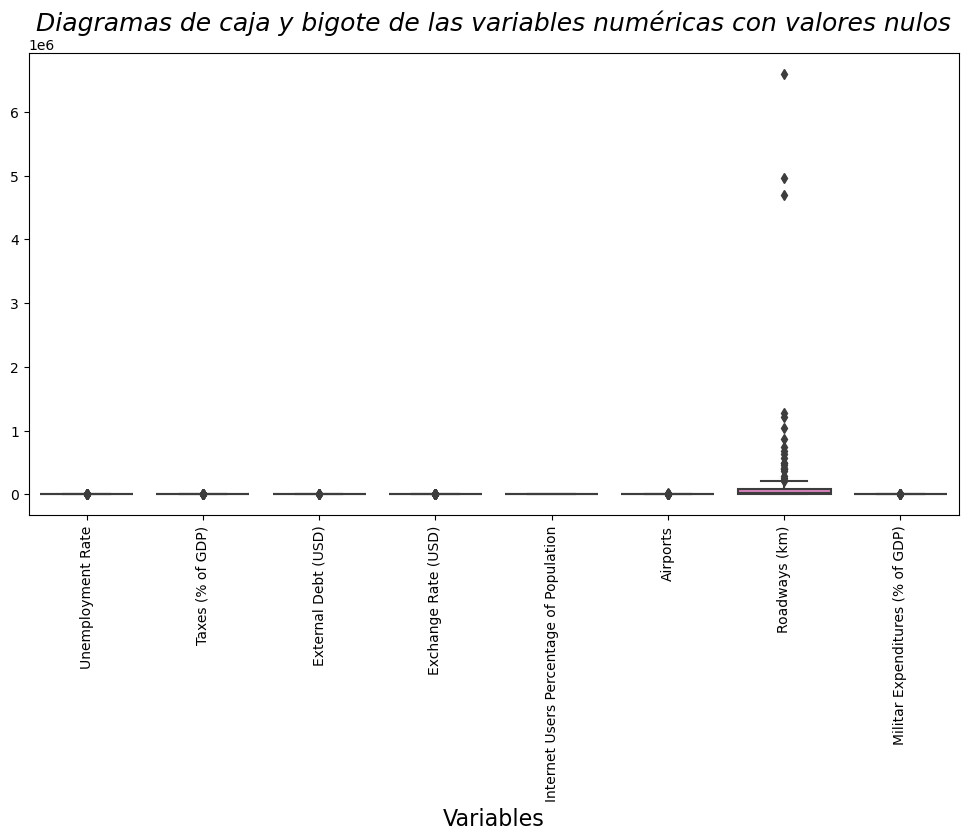

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1[["Unemployment Rate", "Taxes (% of GDP)", "External Debt (USD)", "Exchange Rate (USD)", "Internet Users Percentage of Population", "Airports", "Roadways (km)", "Militar Expenditures (% of GDP)"]])
plt.xticks(rotation=90)
plt.xlabel("Variables", fontsize=16, fontstyle="normal")
plt.title("Diagramas de caja y bigote de las variables numéricas con valores nulos", fontsize=18, fontstyle='italic')
plt.show()

Como tenemos valores atípicos en algunas variables (al punto de que la visualización no aportó mucho al análsis), lo mejor es sustituir los datos nulos con la mediana. Esto para que justo no nos veamos afectados por los datos nulos.

In [40]:
df1["Unemployment Rate"] = df1["Unemployment Rate"].fillna(df1["Unemployment Rate"].median())
df1["Taxes (% of GDP)"] = df1["Taxes (% of GDP)"].fillna(df1["Taxes (% of GDP)"].median())
df1["External Debt (USD)"] = df1["External Debt (USD)"].fillna(df1["External Debt (USD)"].median())
df1["Exchange Rate (USD)"] = df1["Exchange Rate (USD)"].fillna(df1["Exchange Rate (USD)"].median())
df1["Internet Users Percentage of Population"] = df1["Internet Users Percentage of Population"].fillna(df1["Internet Users Percentage of Population"].median())
df1["Airports"] = df1["Airports"].fillna(df1["Airports"].median())
df1["Roadways (km)"] = df1["Roadways (km)"].fillna(df1["Roadways (km)"].median())
df1["Militar Expenditures (% of GDP)"] = df1["Militar Expenditures (% of GDP)"].fillna(df1["Militar Expenditures (% of GDP)"].median())

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 253
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                226 non-null    string 
 1   Area (km²)                               226 non-null    int64  
 2   Population                               226 non-null    int64  
 3   Unemployment Rate                        226 non-null    float64
 4   Taxes (% of GDP)                         226 non-null    float64
 5   External Debt (USD)                      226 non-null    float64
 6   Exchange Rate (USD)                      226 non-null    float64
 7   Internet Users Percentage of Population  226 non-null    float64
 8   Airports                                 226 non-null    float64
 9   Roadways (km)                            226 non-null    float64
 10  Militar Expenditures (% of GDP)          226 non-null  

### 3.2.4 Manejo de datos atípicos

Como pudimos ver al examinar los datos de las variables con datos nulos, tenemos varias con datos atípicos. De hecho, variables como Population o Area (km²) van a ser mucho más cambiantes por la varianza de sus datos.

Sin embargo, si hacemos un .describe al dataframe nos podemos dar cuenta de que los datos si bien pueden estar en un rango muy grande, no constituyen un dato atípico (o erróneo) como tal.

In [42]:
df1.describe()

,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
count,2.260000e+02,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02,226.000000
mean,6.004229e+05,3.403856e+07,10.156947,10.359071,53.178761,84.074633,56.949381,182.570796,1.553120e+05,1.935265
std,1.798838e+06,1.343051e+08,10.220539,10.623810,32.065440,181.929717,28.003712,955.294252,6.453867e+05,1.876905
min,2.000000e+00,6.700000e+01,0.300000,0.300000,0.000000,0.304900,1.310000,1.000000,0.000000e+00,0.200000
25%,5.287250e+03,5.006900e+05,4.000000,4.000000,34.475000,1.000000,31.892500,7.000000,2.743750e+03,1.200000
50%,8.123350e+04,5.583666e+06,6.900000,6.900000,48.900000,4.014175,60.190000,32.000000,2.054400e+04,1.600000
75%,4.451292e+05,2.262876e+07,11.800000,11.875000,65.550000,50.826250,80.682500,98.000000,8.418025e+04,2.062500
max,1.709824e+07,1.397898e+09,77.000000,77.000000,237.600000,839.100000,99.650000,13513.000000,6.586610e+06,24.000000


Solamente tendremos que tener esto en consideración al momento de escalar el dataframe.

### 3.2.5 Manejo de los datos categóricos

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 253
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                226 non-null    string 
 1   Area (km²)                               226 non-null    int64  
 2   Population                               226 non-null    int64  
 3   Unemployment Rate                        226 non-null    float64
 4   Taxes (% of GDP)                         226 non-null    float64
 5   External Debt (USD)                      226 non-null    float64
 6   Exchange Rate (USD)                      226 non-null    float64
 7   Internet Users Percentage of Population  226 non-null    float64
 8   Airports                                 226 non-null    float64
 9   Roadways (km)                            226 non-null    float64
 10  Militar Expenditures (% of GDP)          226 non-null  

Como podemos ver las columnas con datos categóricos son: continent y GDP. Esta última es nuestra clase por lo que ya sabemos que tiene 3 valores. 

In [44]:
df1["Continent"].value_counts()

Continent
Africa                               54
Europe                               46
Central America and the Caribbean    30
Oceania                              23
Asia                                 22
Middle East                          16
Southeast Asia                       14
South America                        13
North America                         5
Arctic Region                         2
AsiaEurope                            1
Name: count, dtype: Int64

Para el caso de Continent tenemos 11 valores posibles. Por lo tanto, considero que ambas variables categóricas las podemos mapear con el LabelEncoder.

In [45]:
le = LabelEncoder()
df2 = df1.iloc[:,:]
df2["Continent"] = le.fit_transform(df2["Continent"])
df2["GDP"] = le.fit_transform(df2["GDP"])

In [46]:
df2.head()

,Continent,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP),GDP
0,2,652230,37466414,23.90,23.90,7.0,7.870,13.50,46.0,34903.0,1.2,1
2,5,28748,3088385,5.83,5.83,71.8,102.430,71.85,3.0,3945.0,1.3,2
3,0,2381740,43576691,11.70,11.70,27.5,131.085,59.58,149.0,104000.0,6.0,2
4,8,224,46366,29.80,29.80,12.2,1.000,31.30,3.0,241.0,1.6,2
5,5,468,85645,3.70,3.70,41.0,0.885,91.57,32.0,320.0,1.6,0


Como podemos ver todo nuestro dataframe ya está codificado con valores numéricos

### 3.2.6 Manejo de los datos numéricos

Para el manejo de los datos numéricos vamos a normalizar cada columna (salvo la que será nuestro vector de etiquetas Y). Decidí normalizar y no estandarizar porque algunos valores ya están entre el 0 y el 1 y no quiero aplicarles una transformación.

Con esta normalización ya dejaríamos listos los datos para nuestros modelos de machine learning.

In [47]:
df3 = df2.iloc[:,:]
escaler = MinMaxScaler()
columns = ["Continent", "Area (km²)", "Population", "Unemployment Rate", "Taxes (% of GDP)", "External Debt (USD)", "Exchange Rate (USD)", "Internet Users Percentage of Population", "Airports", "Roadways (km)", "Militar Expenditures (% of GDP)"]
df3[columns] = escaler.fit_transform(df3[columns])

In [48]:
df3.head()

,Continent,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP),GDP
0,0.2,0.038146,0.026802,0.307692,0.307692,0.029461,0.009019,0.123958,0.003330,0.005299,0.042017,1
2,0.5,0.001681,0.002209,0.072099,0.072099,0.302189,0.121752,0.717307,0.000148,0.000599,0.046218,2
3,0.0,0.139297,0.031173,0.148631,0.148631,0.115741,0.155914,0.592536,0.010953,0.015790,0.243697,2
4,0.8,0.000013,0.000033,0.384615,0.384615,0.051347,0.000829,0.304962,0.000148,0.000037,0.058824,2
5,0.5,0.000027,0.000061,0.044329,0.044329,0.172559,0.000692,0.917836,0.002294,0.000049,0.058824,0


Con nuestros datos normalizados ya podemos prepararlos para crear y entrenar los modelos de machine learning

## 3.3 Creación de la matriz X y el vector de etiquetas Y

Aquí es importante que la matriz X y el vector Y sean arreglos numéricos, porque si quedan como dataframes generarán problemas al dárselos para entrenar a los modelos

In [49]:
Y = df3["GDP"].values
X = df3.drop("GDP", axis=1).values

In [50]:
X, X.shape

(array([[2.00000000e-01, 3.81459144e-02, 2.68019242e-02, ...,
         3.33037300e-03, 5.29908405e-03, 4.20168067e-02],
        [5.00000000e-01, 1.68122567e-03, 2.20925902e-03, ...,
         1.48016578e-04, 5.98942400e-04, 4.62184874e-02],
        [0.00000000e+00, 1.39297261e-01, 3.11729717e-02, ...,
         1.09532268e-02, 1.57896095e-02, 2.43697479e-01],
        ...,
        [6.00000000e-01, 3.08783828e-02, 2.17463531e-02, ...,
         4.14446418e-03, 1.08249919e-02, 1.72268908e-01],
        [0.00000000e+00, 4.40171620e-02, 1.36474576e-02, ...,
         6.43872114e-03, 1.02740256e-02, 4.20168067e-02],
        [0.00000000e+00, 2.28535218e-02, 1.06087316e-02, ...,
         1.44316163e-02, 1.47673841e-02, 2.10084034e-02]]),
 (226, 11))

In [51]:
Y, Y.shape

(array([1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1,
        0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2,
        1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
        1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2,
        1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0,
        2, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2,
        2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0,
        0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0,
        1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 0, 1, 2, 1,
        1, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2,
        0, 1, 2, 1, 1, 1]),
 (226,))

## 3.4 Creación de los conjuntos de entrenamiento y prueba

En este caso como vamos a realizar validación cruzada de k partes (con K = 10), al momento de hacer la validación cruzada se hará la división de conjunto de entrenamiento y prueba. Por lo tanto, no es necesario crearlos desde un inicio.

## 3.5 Creación de los modelos de machine learning

A continuación se presentan los modelos de machine learning para esta actividad. Para algunos de ellos haremos búsqueda en malla para encontrar la mejor configuración de parámetros. En los que no necesitamos buscar una configuración de parámetros solamente los mencionaremos. En esta sección aun no haremos predicciones, ni el entrenamiento como tal porque eso lo haremos con la validación cruzada para evaluar los modelos en la siguiente sección. 

Primero, vamos a generar funciones multiclase para las métricas f1, recall y precision. Esto porque no podemos darlas directamente como parámetro a los modelos porque nuestro problema es de clasificación multiclase

Recordemos que debemos usar el parámetro *weighted* en estas métricas porque tenemos varias clases y están desbalanceadas.

In [52]:
def f1_multiclase(Ytest, Ypred):
    return f1_score(Ytest, Ypred, average='weighted')

In [53]:
def recall_multiclase(Ytest, Ypred):
    return recall_score(Ytest, Ypred, average='weighted')

In [54]:
def precision_multiclase(Ytest, Ypred):
    return precision_score(Ytest, Ypred, average='weighted')

Recordemos que para el accuracy debemos utilizar balanced_accuracy_score en lugar del accuracy_score normal. Por lo mismo que tenemos las etiquetas de nuestros datos desbalanceados, con balanced_accuracy_score se promedian las exactitudes de cada etiqueta para obtener un resultado más representativo (no sesgado por el desbalanceo de las clases).

### 3.5.1 KNN

El algoritmo de K-Nearest Neighbors puede tener los siguientes parámetros:
- K: cantidad de vecinos que se tomarán en cuenta para asignar la clase al dato por seleccionar
- Función de distancia: función con la que se calcula la distancia entre los datos
- Pesos: los pesos que se le darán a la infomarción de los k datos.

Por lo tanto nuestros parámetros son los siguientes:

In [55]:
paramsKNN = {"n_neighbors": range(1, 21),
          "weights": ['uniform', 'distance'],
          "metric": ['euclidean', 'manhattan', 'cosine']}

Ahora sí, hagamos la búsqueda en malla para cada parámetro

In [56]:
parametrosOptimosAccuracy = GridSearchCV(KNeighborsClassifier(), paramsKNN, scoring=make_scorer(balanced_accuracy_score), cv=10, n_jobs=-1)
parametrosOptimosRecall = GridSearchCV(KNeighborsClassifier(), paramsKNN, scoring=make_scorer(recall_multiclase), cv=10, n_jobs=-1)
parametrosOptimosPrecision = GridSearchCV(KNeighborsClassifier(), paramsKNN, scoring=make_scorer(precision_multiclase), cv=10, n_jobs=-1)
parametrosOptimosF1 = GridSearchCV(KNeighborsClassifier(), paramsKNN, scoring=make_scorer(f1_multiclase), cv=10, n_jobs=-1)

In [57]:
%%time
parametrosOptimosAccuracy.fit(X, Y)

CPU times: total: 625 ms
Wall time: 3.48 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(balanced_accuracy_score))

In [58]:
%%time
parametrosOptimosRecall.fit(X, Y)

CPU times: total: 516 ms
Wall time: 1.39 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_multiclase))

In [59]:
%%time
parametrosOptimosPrecision.fit(X, Y)

CPU times: total: 500 ms
Wall time: 1.45 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(precision_multiclase))

In [60]:
%%time
parametrosOptimosF1.fit(X, Y)

CPU times: total: 547 ms
Wall time: 1.4 s


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_multiclase))

Veamos los parámetros óptimos de cada modelo

In [61]:
parametrosOptimosAccuracy.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [62]:
parametrosOptimosRecall.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [63]:
parametrosOptimosPrecision.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}

In [64]:
parametrosOptimosF1.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

Ahora sus métricas para las que fueron optimizados

In [65]:
parametrosOptimosAccuracy.best_score_

0.7876851851851852

In [66]:
parametrosOptimosRecall.best_score_

0.7796442687747036

In [67]:
parametrosOptimosPrecision.best_score_

0.8004605484546197

In [68]:
parametrosOptimosF1.best_score_

0.7750011021958947

Guardemos los 4 modelos para hacer la comparación con los demás modelos con algoritmos diferentes planteados.

In [69]:
knnAccuracy = parametrosOptimosAccuracy.best_estimator_
knnRecall = parametrosOptimosRecall.best_estimator_
knnPrecision = parametrosOptimosPrecision.best_estimator_
knnF1 = parametrosOptimosF1.best_estimator_

In [70]:
pickle.dump(knnAccuracy, open("knnAccuracy_k4_manhattan_uniform", "wb"))
pickle.dump(knnRecall, open("knnRecall_k9_manhattan_uniform", "wb"))
pickle.dump(knnPrecision, open("knnPrecision_k4_manhattan_uniform", "wb"))
pickle.dump(knnF1, open("knnF1_k9_euclidean_uniform", "wb"))

### 3.5.2 Naive Bayes Gaussiano

Ahora proponemos un modelo probabilístico para asignar las etiquetas: Naive Bayes. En este caso por tener las columnas normalizadas (atributos no discretos) vamos a usar la variable Gaussiana de este modelo de machine learning

En este caso la búsqueda en malla será sólo para optimizar cada modelo en su métrica.

In [71]:
paramsNB = {}

In [72]:
NBAccuracy = GridSearchCV(GaussianNB(), paramsNB, scoring=make_scorer(balanced_accuracy_score), cv=10, n_jobs=-1)
NBRecall = GridSearchCV(GaussianNB(), paramsNB, scoring=make_scorer(recall_multiclase), cv=10, n_jobs=-1)
NBPrecision = GridSearchCV(GaussianNB(), paramsNB, scoring=make_scorer(precision_multiclase), cv=10, n_jobs=-1)
NBF1 = GridSearchCV(GaussianNB(), paramsNB, scoring=make_scorer(f1_multiclase), cv=10, n_jobs=-1)

In [73]:
%%time
NBAccuracy.fit(X, Y)

CPU times: total: 0 ns
Wall time: 25.7 ms


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring=make_scorer(balanced_accuracy_score))

In [74]:
%%time
NBRecall.fit(X, Y)

CPU times: total: 15.6 ms
Wall time: 19.9 ms


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring=make_scorer(recall_multiclase))

In [75]:
%%time
NBPrecision.fit(X, Y)

CPU times: total: 0 ns
Wall time: 17.7 ms


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring=make_scorer(precision_multiclase))

In [76]:
%%time
NBF1.fit(X, Y)

CPU times: total: 0 ns
Wall time: 17.9 ms


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring=make_scorer(f1_multiclase))

Veamos los resultados de cada modelo

In [77]:
NBAccuracy.best_score_

0.6905687830687831

In [78]:
NBRecall.best_score_

0.6458498023715415

In [79]:
NBPrecision.best_score_

0.6499489761446284

In [80]:
NBF1.best_score_

0.6132001272235489

Guardamos los modelos

In [81]:
NaiveBayesAccuracy = NBAccuracy.best_estimator_
NaiveBayesRecall = NBRecall.best_estimator_
NaiveBayesPrecision = NBPrecision.best_estimator_
NaiveBayesF1 = NBF1.best_estimator_

In [82]:
pickle.dump(NaiveBayesAccuracy, open("NaiveBayesAccuracy", "wb"))
pickle.dump(NaiveBayesRecall, open("NaiveBayesRecall", "wb"))
pickle.dump(NaiveBayesPrecision, open("NaiveBayesPrecision", "wb"))
pickle.dump(NaiveBayesF1, open("NaiveBayesF1", "wb"))

### 3.5.3 Árbol de decisión

Para nuestro tercer modelo propongo un árbol de decisión. En este caso no era necesario el procesamiento de los atributos para normalizarlos como con el resto de modelos. Sin embargo, como ya los tenemos así vamos a utilizarlos esperando que el árbol que obtengamos pueda separar bien las clases.

En este caso sí tenemos varios parámetros que considerar:
- El estado aleatorio inicial del modelo
- Los criterios de pureza para los nodos del árbol
- La máxima profundidad que puede alcanzar el modelo
- La mínima cantidad de muestras que requiere un nodo para dividirse
- La mínima cantidad de muestras que requiere una hoja para formarse

Por lo tanto, presento las posibles configuraciones de parámetros a continuación

In [83]:
paramsTree = {"random_state": range(6),
                     "criterion": ['gini', 'entropy'],
                     "max_depth": range(2, 16),
                     "min_samples_split": range(2, 6),
                     "min_samples_leaf": range(1, 6)}

Hagamos entonces la búsqueda en malla con validación cruzada de 10 partes, una para maximizar cada una de las 4 métricas que estamos trabajando

In [84]:
parametrosOptimosAccuracy = GridSearchCV(DecisionTreeClassifier(), paramsTree, scoring=make_scorer(balanced_accuracy_score), cv=10, n_jobs=-1)
parametrosOptimosRecall = GridSearchCV(DecisionTreeClassifier(), paramsTree, scoring=make_scorer(recall_multiclase), cv=10, n_jobs=-1)
parametrosOptimosPrecision = GridSearchCV(DecisionTreeClassifier(), paramsTree, scoring=make_scorer(precision_multiclase), cv=10, n_jobs=-1)
parametrosOptimosF1 = GridSearchCV(DecisionTreeClassifier(), paramsTree, scoring=make_scorer(f1_multiclase), cv=10, n_jobs=-1)

In [85]:
%%time
parametrosOptimosAccuracy.fit(X, Y)

CPU times: total: 9.36 s
Wall time: 29.9 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'random_state': range(0, 6)},
             scoring=make_scorer(balanced_accuracy_score))

In [86]:
%%time
parametrosOptimosRecall.fit(X, Y)

CPU times: total: 12.2 s
Wall time: 41.4 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'random_state': range(0, 6)},
             scoring=make_scorer(recall_multiclase))

In [87]:
%%time
parametrosOptimosPrecision.fit(X, Y)

CPU times: total: 11.9 s
Wall time: 38.3 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'random_state': range(0, 6)},
             scoring=make_scorer(precision_multiclase))

In [88]:
%%time
parametrosOptimosF1.fit(X, Y)

CPU times: total: 11.8 s
Wall time: 38.1 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 6),
                         'random_state': range(0, 6)},
             scoring=make_scorer(f1_multiclase))

Veamos los parámetros óptimos

In [89]:
parametrosOptimosAccuracy.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

In [90]:
parametrosOptimosRecall.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

In [91]:
parametrosOptimosPrecision.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 3}

In [92]:
parametrosOptimosF1.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

In [93]:
parametrosOptimosAccuracy.best_score_

0.7819047619047619

In [94]:
parametrosOptimosRecall.best_score_

0.7778656126482213

In [95]:
parametrosOptimosPrecision.best_score_

0.8006127252581565

In [96]:
parametrosOptimosF1.best_score_

0.7768608996069256

Guardamos los modelos

In [97]:
arbolAccuracy = parametrosOptimosAccuracy.best_estimator_
arbolRecall = parametrosOptimosRecall.best_estimator_
arbolPrecision = parametrosOptimosPrecision.best_estimator_
arbolF1 = parametrosOptimosF1.best_estimator_

In [98]:
pickle.dump(arbolAccuracy, open("arbolAccuracy_entropy_profundidad9_hoja3_division2_aleatorio0", "wb"))
pickle.dump(arbolRecall, open("arbolRecall_entropy_profundidad9_hoja3_division2_aleatorio0", "wb"))
pickle.dump(arbolPrecision, open("arbolPrecision_gini_profundidad4_hoja5_division2_aleatorio3", "wb"))
pickle.dump(arbolF1, open("arbolF1_entropy_profundidad9_hoja3_division2_aleatorio0", "wb"))

Antes de pasar al siguiente modelo podemos visualizar cómo quedaron los árboles.

In [99]:
def arbol_visualizador(tree, data):
    fig, ax = plt.subplots(figsize=(32, 12))

    print("Profundidad del árbol: ", tree.get_depth())
    print("Número de nodos terminales: ", tree.get_n_leaves())

    plot = plot_tree(
                decision_tree = tree,
                feature_names = df3.iloc[:,:-1].columns.tolist(),
                class_names   = None,
                filled        = True,
                impurity      = False,
                fontsize      = 11,
                ax            = ax)

Profundidad del árbol:  9
Número de nodos terminales:  30


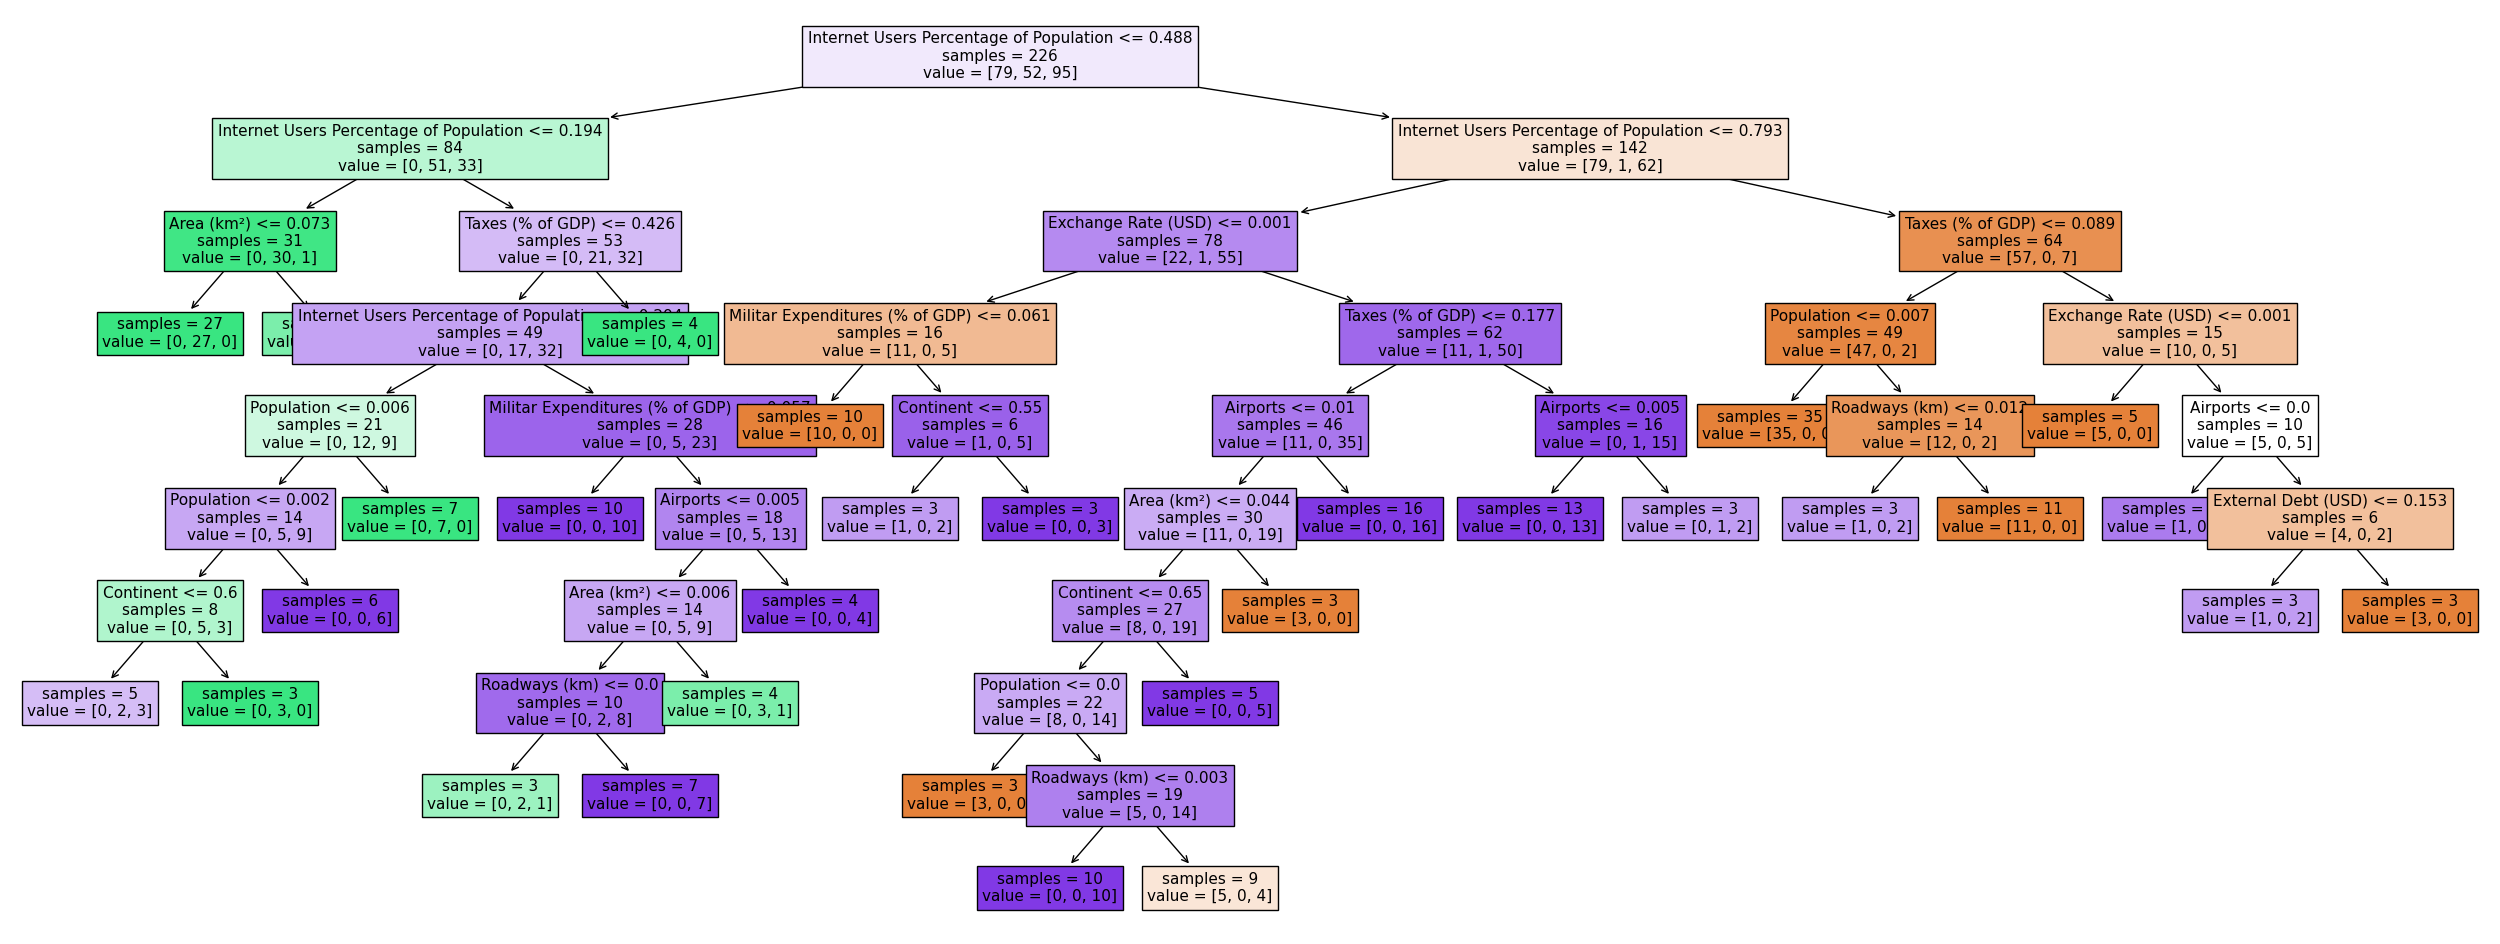

In [100]:
arbol_visualizador(arbolAccuracy, X)

Profundidad del árbol:  9
Número de nodos terminales:  30


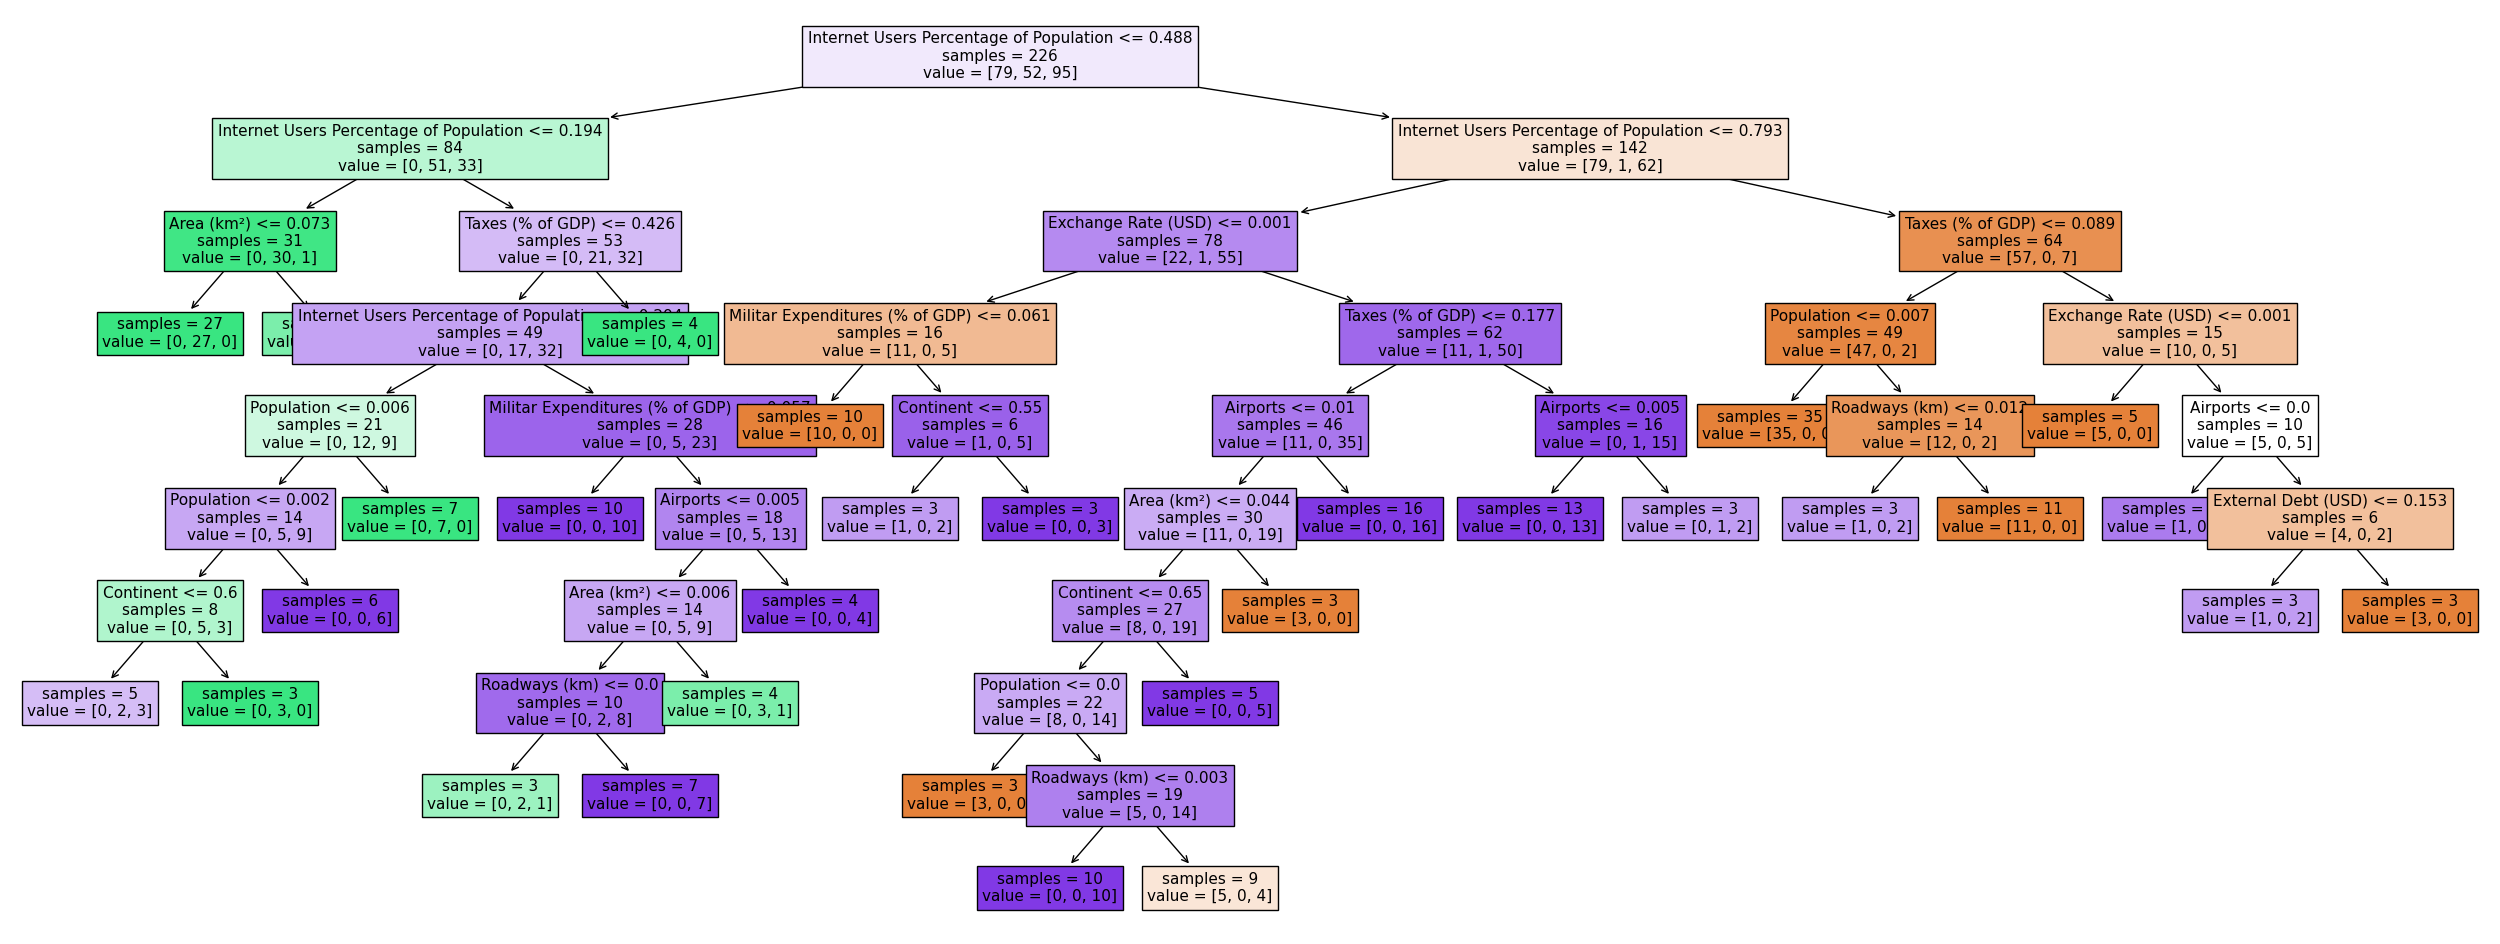

In [101]:
arbol_visualizador(arbolRecall, X)

Profundidad del árbol:  4
Número de nodos terminales:  14


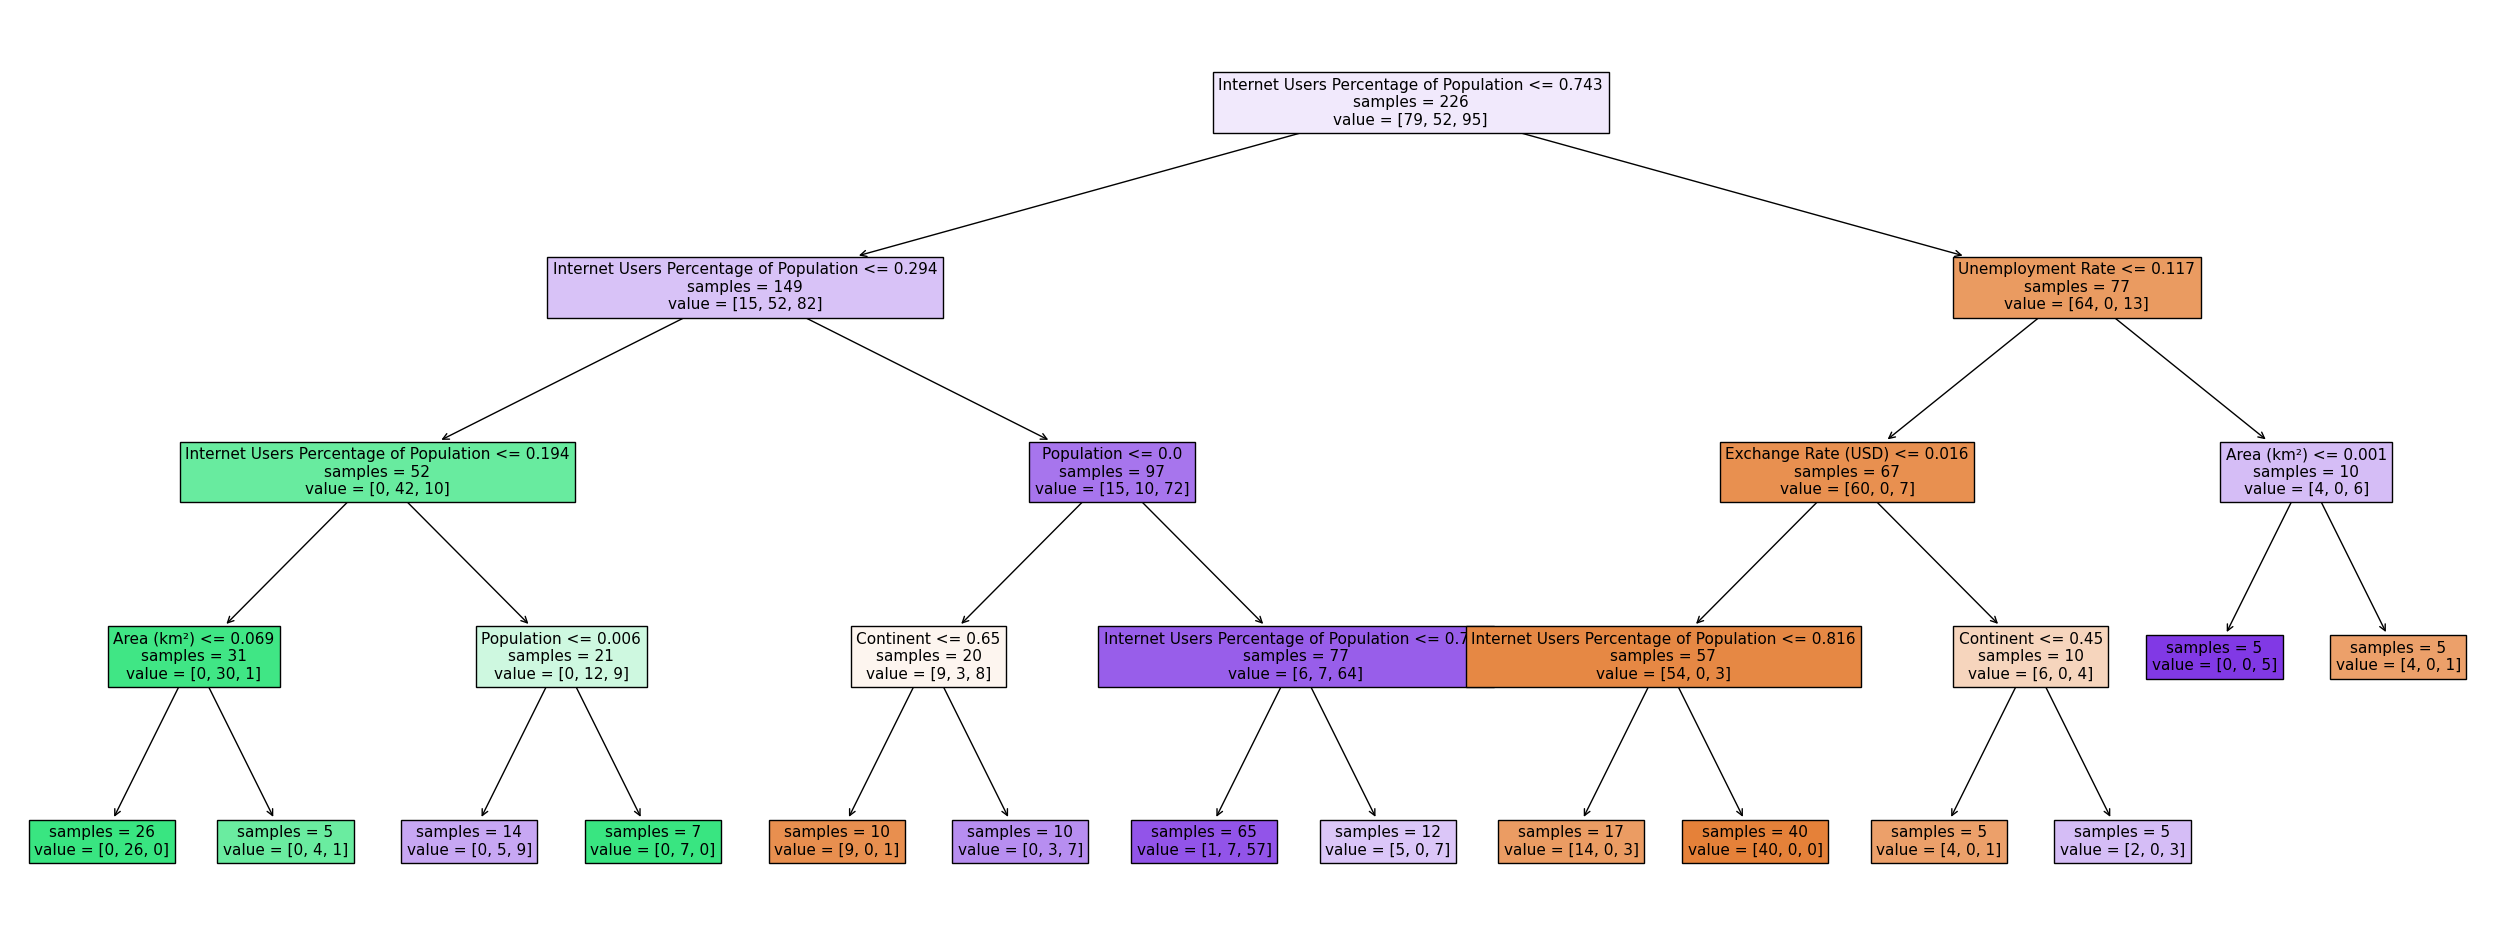

In [102]:
arbol_visualizador(arbolPrecision, X)

Profundidad del árbol:  9
Número de nodos terminales:  30


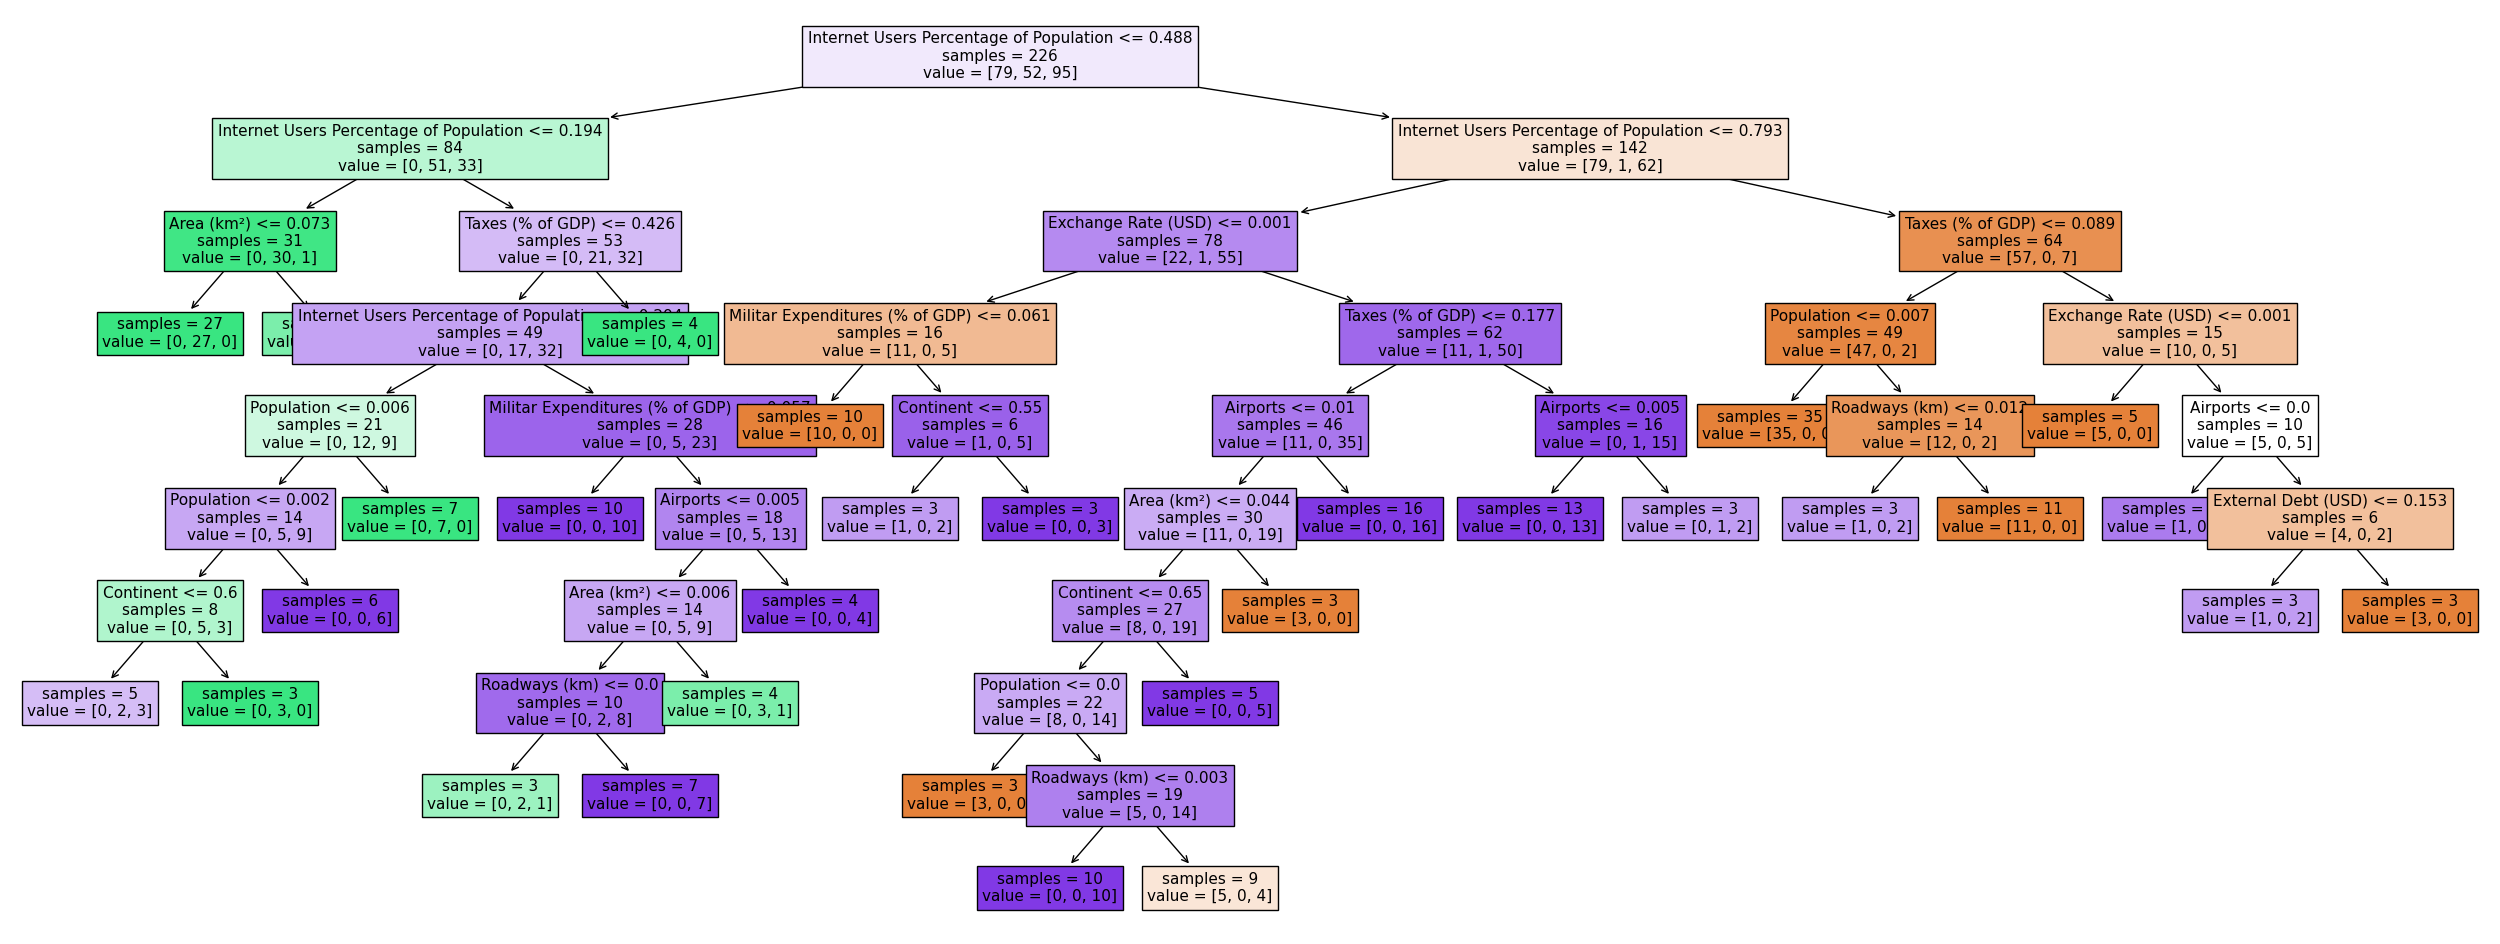

In [103]:
arbol_visualizador(arbolF1, X)

### 3.5.4 Regresión logística

Vamos a hacer un modelo de regresión logística multiclase para nuestros datos. En este caso usaremos los parámetros que vienen por defecto para el clasificador, en especial el de solver (que usa lbfgs) y multi_class directo pondremos multinomial.

Por lo tanto, solamente haremos búsqueda en malla para optimizar cada métrica

In [104]:
paramsRegresion = {"solver":["lbfgs"], "multi_class":["multinomial"]}

In [105]:
regresionLogisticaAccuracy = GridSearchCV(LogisticRegression(), paramsRegresion, scoring=make_scorer(balanced_accuracy_score), cv=10, n_jobs=-1)
regresionLogisticaRecall = GridSearchCV(LogisticRegression(), paramsRegresion, scoring=make_scorer(recall_multiclase), cv=10, n_jobs=-1)
regresionLogisticaPrecision = GridSearchCV(LogisticRegression(), paramsRegresion, scoring=make_scorer(precision_multiclase), cv=10, n_jobs=-1)
regresionLogisticaF1 = GridSearchCV(LogisticRegression(), paramsRegresion, scoring=make_scorer(f1_multiclase), cv=10, n_jobs=-1)

In [106]:
%%time
regresionLogisticaAccuracy.fit(X, Y)

CPU times: total: 0 ns
Wall time: 49 ms


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['multinomial'], 'solver': ['lbfgs']},
             scoring=make_scorer(balanced_accuracy_score))

In [107]:
%%time
regresionLogisticaRecall.fit(X, Y)

CPU times: total: 15.6 ms
Wall time: 55.8 ms


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['multinomial'], 'solver': ['lbfgs']},
             scoring=make_scorer(recall_multiclase))

In [108]:
%%time
regresionLogisticaPrecision.fit(X, Y)

CPU times: total: 0 ns
Wall time: 61.2 ms


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['multinomial'], 'solver': ['lbfgs']},
             scoring=make_scorer(precision_multiclase))

In [109]:
%%time
regresionLogisticaF1.fit(X, Y)

CPU times: total: 0 ns
Wall time: 65.6 ms


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'multi_class': ['multinomial'], 'solver': ['lbfgs']},
             scoring=make_scorer(f1_multiclase))

Veamos los resultados

In [110]:
regresionLogisticaAccuracy.best_score_

0.75260582010582

In [111]:
regresionLogisticaRecall.best_score_

0.7559288537549407

In [112]:
regresionLogisticaPrecision.best_score_

0.7696502860336852

In [113]:
regresionLogisticaF1.best_score_

0.7512557245472785

Guardemos los modelos

In [114]:
regresionAccuracy = regresionLogisticaAccuracy.best_estimator_
regresionRecall = regresionLogisticaRecall.best_estimator_
regresionPrecision = regresionLogisticaPrecision.best_estimator_
regresionF1 = regresionLogisticaF1.best_estimator_

In [115]:
pickle.dump(regresionAccuracy, open("regresionLogisticaAccuracy", "wb"))
pickle.dump(regresionRecall, open("regresionLogisticaRecall", "wb"))
pickle.dump(regresionPrecision, open("regresionLogisticPrecision", "wb"))
pickle.dump(regresionF1, open("regresionLogisticaF1", "wb"))

### 3.5.5 Máquina de soporte vectorial

Para nuestro último clasificador vamos a hacer una máquina de soporte vectorial. Aquí haremos la búsqueda en malla para encontrar la mejor configuración del kernel: lineal, polinomial o rbs (radial basis function)

In [116]:
paramsSVM = {"kernel": ["linear", "poly", "rbf"]}

In [117]:
parametrosOptimosAccuracy = GridSearchCV(SVC(), paramsSVM, scoring=make_scorer(balanced_accuracy_score), cv=10, n_jobs=-1)
parametrosOptimosRecall = GridSearchCV(SVC(), paramsSVM, scoring=make_scorer(recall_multiclase), cv=10, n_jobs=-1)
parametrosOptimosPrecision = GridSearchCV(SVC(), paramsSVM, scoring=make_scorer(precision_multiclase), cv=10, n_jobs=-1)
parametrosOptimosF1 = GridSearchCV(SVC(), paramsSVM, scoring=make_scorer(f1_multiclase), cv=10, n_jobs=-1)

Realizamos la búsqueda

In [118]:
%%time
parametrosOptimosAccuracy.fit(X, Y)

CPU times: total: 0 ns
Wall time: 59.1 ms


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(balanced_accuracy_score))

In [119]:
%%time
parametrosOptimosRecall.fit(X, Y)

CPU times: total: 0 ns
Wall time: 61.5 ms


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(recall_multiclase))

In [120]:
%%time
parametrosOptimosPrecision.fit(X, Y)

CPU times: total: 31.2 ms
Wall time: 84.1 ms


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(precision_multiclase))

In [121]:
%%time
parametrosOptimosF1.fit(X, Y)

CPU times: total: 0 ns
Wall time: 62.2 ms


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring=make_scorer(f1_multiclase))

Veamos los mejores kernel según las búsquedas en malla 

In [122]:
parametrosOptimosAccuracy.best_params_

{'kernel': 'linear'}

In [123]:
parametrosOptimosRecall.best_params_

{'kernel': 'linear'}

In [124]:
parametrosOptimosPrecision.best_params_

{'kernel': 'linear'}

In [125]:
parametrosOptimosF1.best_params_

{'kernel': 'linear'}

Con los siguientes resultados

In [126]:
parametrosOptimosAccuracy.best_score_

0.7771428571428571

In [127]:
parametrosOptimosRecall.best_score_

0.7741106719367588

In [128]:
parametrosOptimosPrecision.best_score_

0.7895918782578862

In [129]:
parametrosOptimosF1.best_score_

0.7713346325738593

Vemos que todas las métricas se optimizaron con el kernel lineal. Guardemos los modelos para pasar a la sección de comparación.

In [130]:
SVMAccuracy = parametrosOptimosAccuracy.best_estimator_
SVMRecall = parametrosOptimosRecall.best_estimator_
SVMPrecision = parametrosOptimosPrecision.best_estimator_
SVMF1 = parametrosOptimosF1.best_estimator_

In [131]:
pickle.dump(SVMAccuracy, open("SVMAccuracy_kernelLineal", "wb"))
pickle.dump(SVMRecall, open("SVMRecall_kernelLineal", "wb"))
pickle.dump(SVMPrecision, open("SVMPrecision_kernelLineal", "wb"))
pickle.dump(SVMF1, open("SVMF1_kernelLineal", "wb"))

## 3.6 Comparación de los modelos con validación cruzada de 10 partes

Con nuestros modelos ya con sus parámetros definidos podemos pasar a la validación cruzada de 10 partes. 

Este procedimiento lo haremos con cada modelo para obtener sus 4 métricas y poder graficarlas. Esto en orden de obtener el mejor modelo posible de cada algoritmo

In [132]:
scoring = ["balanced_accuracy", "precision_weighted", "recall_weighted", "f1_weighted"]

**KNN**

In [133]:
knnVCAccuracy = cross_validate(knnAccuracy, X, Y, scoring=scoring, cv=10, n_jobs=-1)
knnVCRecall = cross_validate(knnRecall, X, Y, scoring=scoring, cv=10, n_jobs=-1)
knnVCPrecision = cross_validate(knnPrecision, X, Y, scoring=scoring, cv=10, n_jobs=-1)
knnVCF1 = cross_validate(knnF1, X, Y, scoring=scoring, cv=10, n_jobs=-1)

In [134]:
knnMetricas = [knnVCAccuracy['test_balanced_accuracy'].mean(), knnVCRecall['test_recall_weighted'].mean(), knnVCPrecision['test_precision_weighted'].mean(), knnVCF1['test_f1_weighted'].mean()]

In [135]:
knnMetricas

[0.7876851851851852,
 0.7796442687747036,
 0.8004605484546197,
 0.7750011021958947]

**Naive Bayes Gaussiano**

In [136]:
NBGaussianoVDAccuracy = cross_validate(NBAccuracy, X, Y, scoring=scoring, cv=10, n_jobs=-1)
NBGaussianoVDRecall = cross_validate(NBRecall, X, Y, scoring=scoring, cv=10, n_jobs=-1)
NBGaussianoVDPrecision = cross_validate(NBPrecision, X, Y, scoring=scoring, cv=10, n_jobs=-1)
NBGaussianoVDF1 = cross_validate(NBF1, X, Y, scoring=scoring, cv=10, n_jobs=-1)

In [137]:
NBMetricas = [NBGaussianoVDAccuracy['test_balanced_accuracy'].mean(), NBGaussianoVDRecall['test_recall_weighted'].mean(), NBGaussianoVDPrecision['test_precision_weighted'].mean(), NBGaussianoVDF1['test_f1_weighted'].mean()]

In [138]:
NBMetricas

[0.6905687830687831,
 0.6458498023715415,
 0.6499489761446284,
 0.6132001272235489]

**Árbol de decisión**

In [139]:
arbolVDAccuracy = cross_validate(arbolAccuracy, X, Y, scoring=scoring, cv=10, n_jobs=-1)
arbolVDRecall = cross_validate(arbolRecall, X, Y, scoring=scoring, cv=10, n_jobs=-1)
arbolVDPrecision = cross_validate(arbolPrecision, X, Y, scoring=scoring, cv=10, n_jobs=-1)
arbolVDF1 = cross_validate(arbolF1, X, Y, scoring=scoring, cv=10, n_jobs=-1)

In [140]:
arbolMetricas = [arbolVDAccuracy['test_balanced_accuracy'].mean(), arbolVDRecall['test_recall_weighted'].mean(), arbolVDPrecision['test_precision_weighted'].mean(), arbolVDF1['test_f1_weighted'].mean()]

In [141]:
arbolMetricas

[0.7819047619047619,
 0.7778656126482213,
 0.8006127252581565,
 0.7768608996069256]

**Regresión logística**

In [142]:
regresionLogisticaVDAccuracy = cross_validate(regresionAccuracy, X, Y, scoring=scoring, cv=10, n_jobs=-10)
regresionLogisticaVDRecall = cross_validate(regresionRecall, X, Y, scoring=scoring, cv=10, n_jobs=-10)
regresionLogisticaVDPrecision = cross_validate(regresionPrecision, X, Y, scoring=scoring, cv=10, n_jobs=-10)
regresionLogisticaVDF1= cross_validate(regresionF1, X, Y, scoring=scoring, cv=10, n_jobs=-10)

In [143]:
regresionMetricas = [regresionLogisticaVDAccuracy['test_balanced_accuracy'].mean(), regresionLogisticaVDRecall['test_recall_weighted'].mean(), regresionLogisticaVDPrecision['test_precision_weighted'].mean(), regresionLogisticaVDF1['test_f1_weighted'].mean()]

In [144]:
regresionMetricas

[0.75260582010582, 0.7559288537549407, 0.7696502860336852, 0.7512557245472785]

**Máquina de soporte vectorial**

In [145]:
SVMVDAccuracy = cross_validate(SVMAccuracy, X, Y, scoring=scoring, cv=10, n_jobs=-1)
SVMVDRecall = cross_validate(SVMRecall, X, Y, scoring=scoring, cv=10, n_jobs=-1)
SVMVDPrecision = cross_validate(SVMPrecision, X, Y, scoring=scoring, cv=10, n_jobs=-1)
SVMVDF1 = cross_validate(SVMF1, X, Y, scoring=scoring, cv=10, n_jobs=-1)

In [146]:
SVMMetricas = [SVMVDAccuracy['test_balanced_accuracy'].mean(), SVMVDRecall['test_recall_weighted'].mean(), SVMVDPrecision['test_precision_weighted'].mean(), SVMVDF1['test_f1_weighted'].mean()]

In [147]:
SVMMetricas

[0.7771428571428571,
 0.7741106719367588,
 0.7895918782578862,
 0.7713346325738593]

Ya tenemos calculadas las métricas para cada modelo. Ahora podemos visualizarlas para poderlas comparar de mejor manera

Hagamos gráficas para analizar las métricas

C:\Yo\Anaconda\envs\ds1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Yo\Anaconda\envs\ds1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Yo\Anaconda\envs\ds1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Yo\Anaconda\envs\ds1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

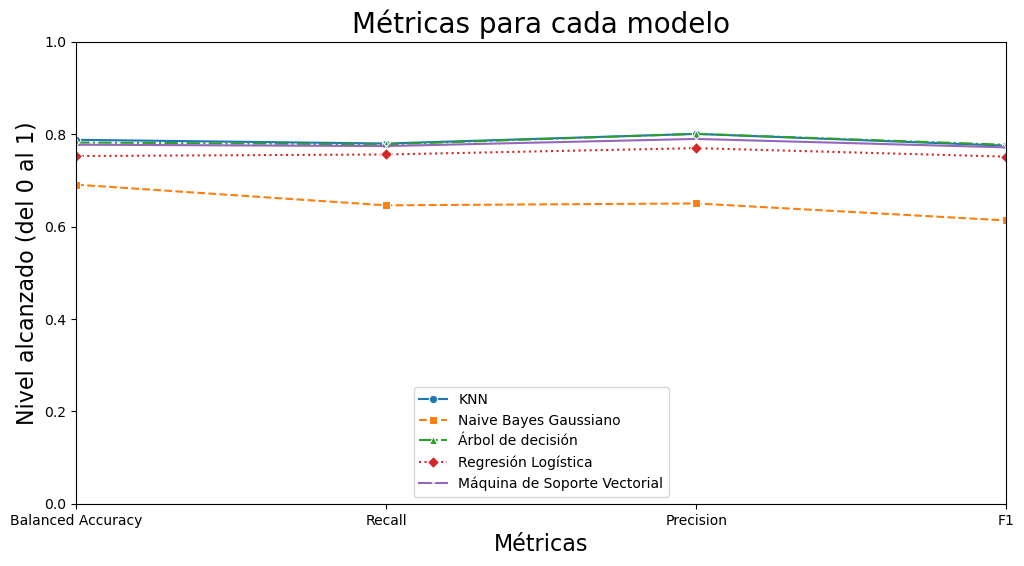

In [148]:
plt.figure(figsize=(12,6))
sns.lineplot(x=["Balanced Accuracy","Recall","Precision","F1"], y=knnMetricas, label='KNN', linestyle='-', marker='o')
sns.lineplot(x=["Balanced Accuracy","Recall","Precision","F1"], y=NBMetricas, label='Naive Bayes Gaussiano', linestyle='--', marker='s')
sns.lineplot(x=["Balanced Accuracy","Recall","Precision","F1"], y=arbolMetricas, label='Árbol de decisión', linestyle='-.', marker='^')
sns.lineplot(x=["Balanced Accuracy","Recall","Precision","F1"], y=regresionMetricas, label='Regresión Logística', linestyle=':', marker='D')
sns.lineplot(x=["Balanced Accuracy","Recall","Precision","F1"], y=SVMMetricas, label='Máquina de Soporte Vectorial', linestyle='-', marker='x')
plt.ylim(0,1)
plt.xlim(0, 3)
plt.title("Métricas para cada modelo", size=20)
plt.xlabel("Métricas", size=16)
plt.ylabel("Nivel alcanzado (del 0 al 1)", size=16)
plt.legend(loc=8)
plt.show()

Cambiando la visualización para facilitar el análisis

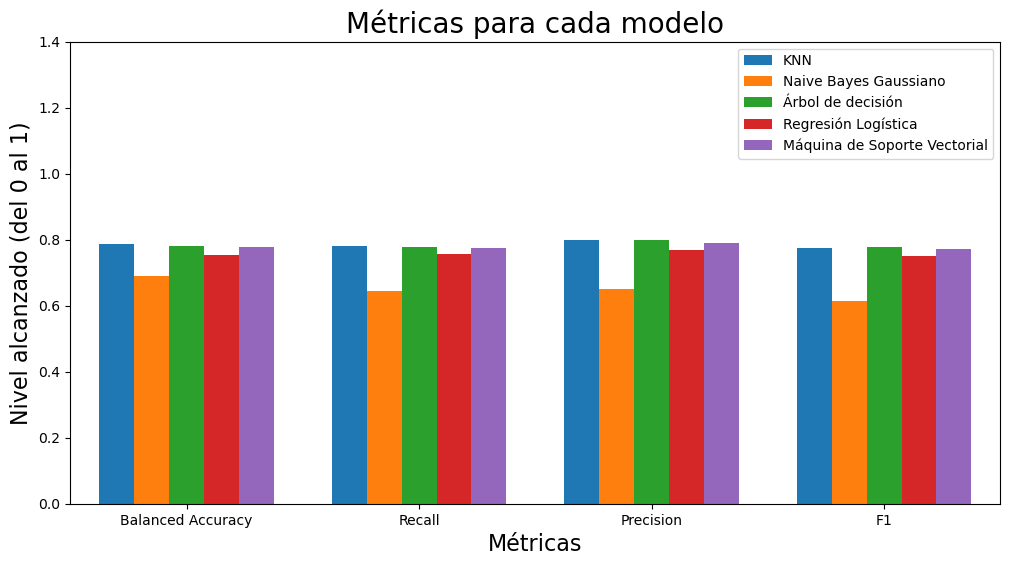

In [149]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
ancho = 0.15

posiciones = list(range(4))
posiciones_knn = [pos - ancho*2 for pos in posiciones]
posiciones_naive_bayes = [pos - ancho for pos in posiciones]
posiciones_arbol = posiciones
posiciones_regresion_logistica = [pos + ancho for pos in posiciones]
posiciones_svm = [pos + ancho*2 for pos in posiciones]

ax.bar(posiciones_knn, knnMetricas, width=ancho, label='KNN')
ax.bar(posiciones_naive_bayes, NBMetricas, width=ancho, label='Naive Bayes Gaussiano')
ax.bar(posiciones_arbol, arbolMetricas, width=ancho, label='Árbol de decisión')
ax.bar(posiciones_regresion_logistica, regresionMetricas, width=ancho, label='Regresión Logística')
ax.bar(posiciones_svm, SVMMetricas, width=ancho, label='Máquina de Soporte Vectorial')

plt.ylim(0, 1.4)
plt.xlim(-0.5, 3.5)
plt.xticks(posiciones, ["Balanced Accuracy","Recall","Precision","F1"])
plt.title("Métricas para cada modelo", size=20)
plt.xlabel("Métricas", size=16)
plt.ylabel("Nivel alcanzado (del 0 al 1)", size=16)
plt.legend(loc='upper right')
plt.show()

**Observaciones para determinar el modelo ganador**

- Como podemos ver en la primera gráfica todos los algoritmos al optimizar sus métricas en un determinado modelo se comportan igual: comienzan con una exactitud balanceada entre el 70% y el 80%, luego su sensibilidad baja ligeramente, posteriormente su precisión sube y finalmente la f1 baja. Por lo tanto, como todos los modelos se comportan igual en ese sentido, podemos elegir el clasificador que tenga los valores más altos en la mayoría de las métricas.
- Si elegimos con base en la anterior afirmación podemos observar en la segunda gráfica que los dos claros candidatos son KNN y el árbol de decisión. La máquina de soporte vectorial tuvo buen desempeño, pero el árbol de decisión la superó por muy poco en las 4 métricas.
- Entre los dos cantidatos vemos que el árbol supera al algoritmo de vecinos más cercanos en la precisión y en la f1. Sin embargo, en la sensibilidad están prácticamente iguales y en la exactitud balanceada el de vecinos más cercanos gana por muy poco. Por lo tanto, para elegir de entre estos modelos tenemos que definir cuál métrica es más importante para nuestro conjunto de datos: el modelo que destaque más en esa métrica será el modelo ganador.
- Lo que queremos hacer con el modelo es poder clasificar si un país tiene un ingreso bajo, medio o alto. Además, hay que tomar en cuenta que las clases están desbalanceadas: hay casi el doble de instancias de países de ingreso medio que de ingreso bajo. De hecho, la categoría de ingreso medio está cerca de ser la mitad del total de los datos.
    - Por lo tanto, la exactitud aunque sea balanceada puede verse sesgada si alguna de las 3 categorías (seguramente el ingreso medio) tuvo un muy buen desempeño.
    - Por otra parte, la sensibilidad sólo nos interesaría para alguna de las clases minoritarias: que no se nos pasen esas clases de pocas instancias porque por el entrenamiento van a ser difíciles de predecir. Sin embargo, podemos plantear esto más adecuadamente desde la precisión: nos interesa más que lo que cataloguemos como de un tipo de ingreso sea efectivamente de ese ingreso. Entre mejor queden definidas cada clase el algoritmo será mejor para nuestro interés.
- Por lo tanto, el modelo ganador es con el algoritmo de árboles de decisión, específicamente el que maximiza la precisión.

*Nota:* escogimos el árbol de decisión por ser el que alcanzó mayor puntaje en la precisión. Sin embargo, el segundo y tercer lugar en esa métrica (K vecinos más cercanos y máquina de soporte vectorial) no se quedaron tan lejos. Por lo que perfectamente se podría trabajar con esos modelos.

Veamos entonces cómo se comporta el modelo ganador pero en las demás métricas, no sólo en la precisión (que es la que maximiza).

In [157]:
modeloGanadorMetricas = [arbolVDPrecision['test_balanced_accuracy'].mean(), arbolVDPrecision['test_recall_weighted'].mean(), arbolVDPrecision['test_precision_weighted'].mean(), arbolVDPrecision['test_f1_weighted'].mean()]

In [159]:
print(f"Méticas del modelo ganador:\nBalanced accuracy: {round(modeloGanadorMetricas[0]*100, 2)}%\nRecall: {round(modeloGanadorMetricas[1]*100, 2)}%\nPrecisión: {round(modeloGanadorMetricas[2]*100, 2)}%\nF1: {round(modeloGanadorMetricas[3]*100, 2)}%")

Méticas del modelo ganador:
Balanced accuracy: 75.51%
Recall: 76.88%
Precisión: 80.06%
F1: 76.01%


Como podemos ver la F1 es incluso menor que la sensibilidad. Esto matemáticamente no está bien porque la f1 es la media armónica del recall y la precisión. Por lo que el valor debería ser 78.43. La razón por la que nos reportó el 76.01% es porque se calcularon 10 veces la f1 con la validación cruzada. De modo que ese 76.01 es la media de esas 10 f1, no es la que obtendríamos de la media armónica de los promedios de la precisión y el recall.

Ahora sobre el modelo ganador en general: para la precisión funciona bastante bien: tener 80.06% nos da buena seguridad de que lo que clasifiquemos en un tipo de ingreso sí sea de ese tipo. Por otro lado, el resto de métricas no caen tan bajo: se mantienen en porcentajes aceptables.

Veamos de nuevo entonces el diagrama de este árbol de decisión.

Profundidad del árbol:  4
Número de nodos terminales:  14


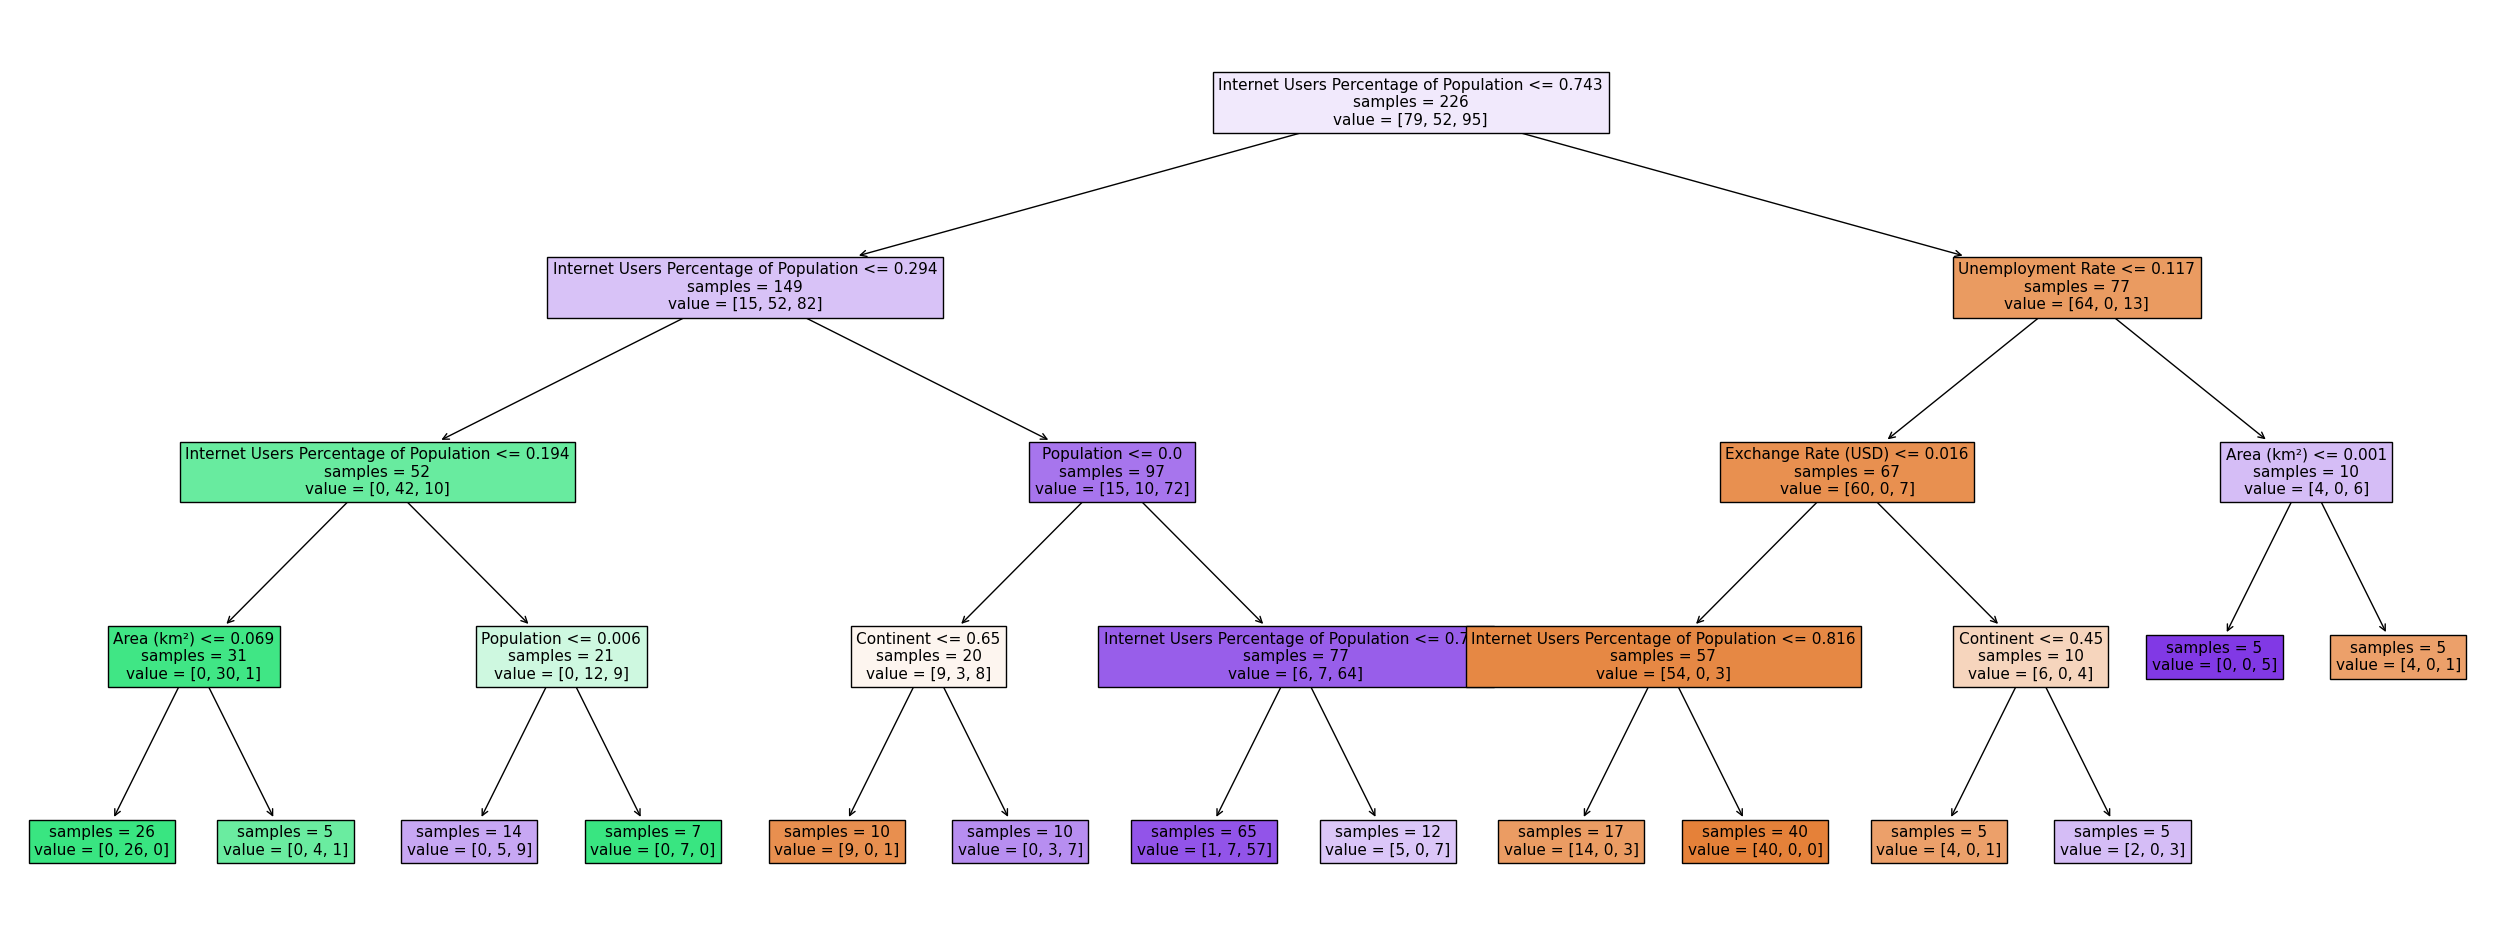

In [160]:
arbol_visualizador(arbolPrecision, X)

Recordemos que los parámetros de este modelo de árbol de decisión son: 
- Estado inicial aleatorio: 3
- Criterio de impureza gini
- Máxima profundidad de 4
- Instancias mínimas para crear una hoja: 5
- Instancias mínimas para separar una hora: 2: 3}

# 4. Ejemplos de ejecución con el modelo ganador

Ya que tenemos el modelo ganador veamos unos cuantos ejemplos de países con datos actuales para que los catelogue como ingreso bajo, medio o alto. Voy a usar de ejemplos a México, Canadá y Mónaco

En primer lugar tenemos que ver el significado de la codificación de las etiquetas

In [163]:
Y[:5]

array([1, 2, 2, 2, 0])

In [164]:
categorias = le.inverse_transform(df3["GDP"])
categorias[:5]

array(['ingreso bajo', 'ingreso medio', 'ingreso medio', 'ingreso medio',
       'ingreso alto'], dtype=object)

Por lo tanto:
- Ingreso bajo -> 1
- Ingreso medio -> 2
- Ingreso alto -> 0

Creemos entonces los 3 ejemplos para mostrar la ejecución del algoritmo

In [168]:
prueba = {"Continent":["North America", "North America", "Europe"],
         "Area (km²)":[1_973_000, 9_985_000, 2],
         "Population":[127_500_000, 38_930_000, 36469],
         "Unemployment Rate":[3.3, 6.1, 0],
         "Taxes (% of GDP)":[16.9, 12.1, 13.2],
         "External Debt (USD)":[6.707, 66.929, 434.000],
         "Exchange Rate (USD)":[16.64, 1.38, 0.94],
         "Internet Users Percentage of Population":[75.6,92.8,80],
         "Airports":[78, 500, 0],
         "Roadways (km)":[780_511, 1_042_300, 50],
         "Militar Expenditures (% of GDP)":[0.7, 1.29, 0]}

In [177]:
dfPrueba = pd.DataFrame(data=prueba, columns=df3.columns[:-1])
dfPrueba

,Continent,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,North America,1973000,127500000,3.3,16.9,6.707,16.64,75.6,78,780511,0.70
1,North America,9985000,38930000,6.1,12.1,66.929,1.38,92.8,500,1042300,1.29
2,Europe,2,36469,0.0,13.2,434.000,0.94,80.0,0,50,0.00


Codifiquemos la columna cualitativa

In [178]:
dfPrueba['Continent'] = le.fit_transform(dfPrueba["Continent"])
dfPrueba["Continent"] = dfPrueba["Continent"].astype(int)
dfPrueba

,Continent,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,1,1973000,127500000,3.3,16.9,6.707,16.64,75.6,78,780511,0.70
1,1,9985000,38930000,6.1,12.1,66.929,1.38,92.8,500,1042300,1.29
2,0,2,36469,0.0,13.2,434.000,0.94,80.0,0,50,0.00


Escalemos el dataframe

In [180]:
dfPrueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                3 non-null      int32  
 1   Area (km²)                               3 non-null      int64  
 2   Population                               3 non-null      int64  
 3   Unemployment Rate                        3 non-null      float64
 4   Taxes (% of GDP)                         3 non-null      float64
 5   External Debt (USD)                      3 non-null      float64
 6   Exchange Rate (USD)                      3 non-null      float64
 7   Internet Users Percentage of Population  3 non-null      float64
 8   Airports                                 3 non-null      int64  
 9   Roadways (km)                            3 non-null      int64  
 10  Militar Expenditures (% of GDP)          3 non-null   

In [181]:
dfPrueba[dfPrueba.columns] = escaler.fit_transform(dfPrueba[dfPrueba.columns])

In [182]:
dfPrueba

,Continent,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
0,1.0,0.197596,1.000000,0.540984,1.000000,0.000000,1.000000,0.000000,0.156,0.748823,0.542636
1,1.0,1.000000,0.305135,1.000000,0.000000,0.140938,0.028025,1.000000,1.000,1.000000,1.000000
2,0.0,0.000000,0.000000,0.000000,0.229167,1.000000,0.000000,0.255814,0.000,0.000000,0.000000


Veamos qué resultados nos da nuestro modelo ganador

In [187]:
arbolPrecision.predict(dfPrueba.values)

array([1, 0, 2])

Interpretando los resultados. Según nuestro árbol de decisión:
- México tiene un ingreso bajo (1)
- Canadá tiene un ingreso alto (0)
- Mónaco tiene un ingreso medio (2)

Las predicciones de México y Canadá claramente tienen sentido y muestran que el algoritmo trabaja correctamente. Pero el caso de Mónaco presenta los posibles sesgos que tiene el algoritmo: países muy chicos cuya información podría ser engañosa los va a confundir.

Continuando con este punto: Mónaco es de los países más ricos del mundo, pero sus datos podrían resultar engañosos: por su extensión territorial no tienen aeropuerto y sus extensiones de carretera son chicas. Estas características podrían ser similares a países con ingresos bajos y por eso nuestro árbol no lo catalogó como de ingreso alto. Sin embargo, no se equivocó de manera excesiva: lo puso como de ingreso medio. Podríamos decir que por falta de entrenamiento o por ser un caso muy particular el algoritmo no pudo saber que Mónaco es un país de ingreso alto. Sin embargo, dado que su prioridad es la precisión, al momento del entrenamiento se le pudo dar suficiente información como para dejar al menos como ingreso medio al principado.

# 5. Conclusiones

En el proceso de hacer ciencia de datos nos vamos a encontrar en diferentes situaciones: limpiar conjuntos de datos sumamentes desordenados, errores en la construcción de modelos, pasar tiempo esperando a que el modelo termine de entrenar, etc. Afortunadamente, en este proyecto nos encontramos casi todas estas situaciones.

Sobre los objetivos particulares de esta actividad, pudimos ver lo provechosa que es la búsqueda en malla en conjunto con la validación cruzada para encontrar los mejores parámetros para un modelo dada una métrica. En especial, como teníamos tan pocos datos para entrenar los modelos fue ideal usar la validación cruzada para no sesgar las predicciones.

Por otro lado, pudimos hacer uso de las métricas estudiadas en clase para analizar los modelos. Al usarlas en la búsqueda en malla con un problema de clasificación multiclase tuvimos la oportunidad de analizar los parámetros de la librería scikit-learn. Esto para trabajos futuros será de gran ayuda porque ya pudimos experimentar con ellos en esta práctica.

Finalmente, sobre el modelo ganador. En este caso por una diferencia muy pequeña el árbol de decisión que optimizaba la precision fue el mejor. Sin embargo, pudimos ver que otros modelos como vecinos más cercanos, máquinas de soporte vectorial o incluso la regresión logística podían usarse para este problema. Sin embargo, si se quisieran subir las métricas lo ideal sería usar modelos más complejos: específicamente ensambles de varios algoritmos. Esto con el objetivo de complementarse los unos a otros para poder catalogar correctamente países que no clasifica bien un sólo modelo. Para esto habría que seguir haciendo uso de las métricas y la validación cruzada, es decir, repetir los pasos de este proyecto pero con algoritmos más complejos.

# 6. Referencias

Además del material de la clase se consultaron las siguientes secciones de la documentación de scikit-learn.

- https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC